# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 39875 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (    1 of 39875) |          | Elapsed Time: 0:00:29 ETA:  13 days, 12:29:52

  0% (   72 of 39875) |                    | Elapsed Time: 0:00:30 ETA:  0:08:55

  0% (  144 of 39875) |                    | Elapsed Time: 0:00:31 ETA:  0:08:51

  0% (  205 of 39875) |                    | Elapsed Time: 0:00:32 ETA:  0:09:21

  0% (  253 of 39875) |                    | Elapsed Time: 0:00:33 ETA:  0:11:44

  0% (  316 of 39875) |                    | Elapsed Time: 0:00:34 ETA:  0:11:23

  0% (  381 of 39875) |                    | Elapsed Time: 0:00:35 ETA:  0:11:05

  1% (  449 of 39875) |                    | Elapsed Time: 0:00:36 ETA:  0:10:47

  1% (  499 of 39875) |                    | Elapsed Time: 0:00:37 ETA:  0:10:41

  1% (  567 of 39875) |                    | Elapsed Time: 0:00:38 ETA:  0:10:29

  1% (  636 of 39875) |                    | Elapsed Time: 0:00:39 ETA:  0:10:31

  1% (  698 of 39875) |                    | Elapsed Time: 0:00:40 ETA:  0:10:41

  1% (  757 of 39875) |                    | Elapsed Time: 0:00:41 ETA:  0:10:42

  2% (  820 of 39875) |                    | Elapsed Time: 0:00:42 ETA:  0:09:39

  2% (  888 of 39875) |                    | Elapsed Time: 0:00:43 ETA:  0:09:33

  2% (  956 of 39875) |                    | Elapsed Time: 0:00:44 ETA:  0:09:29

  2% (  997 of 39875) |                    | Elapsed Time: 0:00:45 ETA:  0:09:28

  2% ( 1066 of 39875) |                    | Elapsed Time: 0:00:46 ETA:  0:09:22

  2% ( 1133 of 39875) |                    | Elapsed Time: 0:00:47 ETA:  0:09:22

  3% ( 1197 of 39875) |                    | Elapsed Time: 0:00:48 ETA:  0:09:26

  3% ( 1254 of 39875) |                    | Elapsed Time: 0:00:49 ETA:  0:09:32

  3% ( 1325 of 39875) |                    | Elapsed Time: 0:00:50 ETA:  0:09:17

  3% ( 1399 of 39875) |                    | Elapsed Time: 0:00:51 ETA:  0:09:05

  3% ( 1474 of 39875) |                    | Elapsed Time: 0:00:52 ETA:  0:08:56

  3% ( 1496 of 39875) |                    | Elapsed Time: 0:00:52 ETA:  0:08:52

  3% ( 1574 of 39875) |                    | Elapsed Time: 0:00:53 ETA:  0:08:43

  4% ( 1646 of 39875) |                    | Elapsed Time: 0:00:54 ETA:  0:08:38

  4% ( 1721 of 39875) |                    | Elapsed Time: 0:00:55 ETA:  0:08:30

  4% ( 1788 of 39875) |                    | Elapsed Time: 0:00:56 ETA:  0:08:26

  4% ( 1858 of 39875) |                    | Elapsed Time: 0:00:57 ETA:  0:08:13

  4% ( 1932 of 39875) |                    | Elapsed Time: 0:00:58 ETA:  0:08:09

  5% ( 1994 of 39875) |#                   | Elapsed Time: 0:00:59 ETA:  0:08:08

  5% ( 2062 of 39875) |#                   | Elapsed Time: 0:01:00 ETA:  0:08:13

  5% ( 2134 of 39875) |#                   | Elapsed Time: 0:01:01 ETA:  0:08:14

  5% ( 2211 of 39875) |#                   | Elapsed Time: 0:01:02 ETA:  0:08:14

  5% ( 2281 of 39875) |#                   | Elapsed Time: 0:01:03 ETA:  0:08:15

  5% ( 2352 of 39875) |#                   | Elapsed Time: 0:01:04 ETA:  0:08:18

  6% ( 2423 of 39875) |#                   | Elapsed Time: 0:01:05 ETA:  0:08:13

  6% ( 2493 of 39875) |#                   | Elapsed Time: 0:01:06 ETA:  0:08:06

  6% ( 2567 of 39875) |#                   | Elapsed Time: 0:01:07 ETA:  0:08:05

  6% ( 2639 of 39875) |#                   | Elapsed Time: 0:01:08 ETA:  0:08:06

  6% ( 2718 of 39875) |#                   | Elapsed Time: 0:01:09 ETA:  0:07:55

  7% ( 2799 of 39875) |#                   | Elapsed Time: 0:01:10 ETA:  0:07:47

  7% ( 2881 of 39875) |#                   | Elapsed Time: 0:01:11 ETA:  0:07:41

  7% ( 2952 of 39875) |#                   | Elapsed Time: 0:01:12 ETA:  0:07:39

  7% ( 2991 of 39875) |#                   | Elapsed Time: 0:01:13 ETA:  0:07:36

  7% ( 3056 of 39875) |#                   | Elapsed Time: 0:01:14 ETA:  0:07:41

  7% ( 3118 of 39875) |#                   | Elapsed Time: 0:01:15 ETA:  0:07:53

  7% ( 3180 of 39875) |#                   | Elapsed Time: 0:01:16 ETA:  0:08:03

  8% ( 3239 of 39875) |#                   | Elapsed Time: 0:01:18 ETA:  0:09:17

  8% ( 3300 of 39875) |#                   | Elapsed Time: 0:01:19 ETA:  0:09:37

  8% ( 3360 of 39875) |#                   | Elapsed Time: 0:01:20 ETA:  0:10:00

  8% ( 3425 of 39875) |#                   | Elapsed Time: 0:01:21 ETA:  0:10:20

  8% ( 3490 of 39875) |#                   | Elapsed Time: 0:01:22 ETA:  0:10:21

  8% ( 3563 of 39875) |#                   | Elapsed Time: 0:01:23 ETA:  0:10:10

  9% ( 3636 of 39875) |#                   | Elapsed Time: 0:01:24 ETA:  0:09:59

  9% ( 3709 of 39875) |#                   | Elapsed Time: 0:01:25 ETA:  0:09:45

  9% ( 3780 of 39875) |#                   | Elapsed Time: 0:01:26 ETA:  0:09:34

  9% ( 3854 of 39875) |#                   | Elapsed Time: 0:01:27 ETA:  0:08:14

  9% ( 3928 of 39875) |#                   | Elapsed Time: 0:01:28 ETA:  0:08:01

 10% ( 3988 of 39875) |##                  | Elapsed Time: 0:01:28 ETA:  0:07:46

 10% ( 4063 of 39875) |##                  | Elapsed Time: 0:01:29 ETA:  0:07:37

 10% ( 4135 of 39875) |##                  | Elapsed Time: 0:01:30 ETA:  0:07:35

 10% ( 4204 of 39875) |##                  | Elapsed Time: 0:01:31 ETA:  0:07:37

 10% ( 4274 of 39875) |##                  | Elapsed Time: 0:01:32 ETA:  0:07:38

 10% ( 4349 of 39875) |##                  | Elapsed Time: 0:01:33 ETA:  0:07:36

 11% ( 4426 of 39875) |##                  | Elapsed Time: 0:01:35 ETA:  0:07:30

 11% ( 4486 of 39875) |##                  | Elapsed Time: 0:01:36 ETA:  0:07:41

 11% ( 4549 of 39875) |##                  | Elapsed Time: 0:01:37 ETA:  0:07:50

 11% ( 4620 of 39875) |##                  | Elapsed Time: 0:01:38 ETA:  0:07:53

 11% ( 4687 of 39875) |##                  | Elapsed Time: 0:01:39 ETA:  0:07:59

 11% ( 4756 of 39875) |##                  | Elapsed Time: 0:01:40 ETA:  0:08:01

 12% ( 4828 of 39875) |##                  | Elapsed Time: 0:01:41 ETA:  0:07:57

 12% ( 4891 of 39875) |##                  | Elapsed Time: 0:01:42 ETA:  0:08:03

 12% ( 4956 of 39875) |##                  | Elapsed Time: 0:01:43 ETA:  0:08:12

 12% ( 4985 of 39875) |##                  | Elapsed Time: 0:01:43 ETA:  0:08:20

 12% ( 5049 of 39875) |##                  | Elapsed Time: 0:01:44 ETA:  0:08:16

 12% ( 5125 of 39875) |##                  | Elapsed Time: 0:01:45 ETA:  0:08:01

 13% ( 5194 of 39875) |##                  | Elapsed Time: 0:01:46 ETA:  0:08:02

 13% ( 5261 of 39875) |##                  | Elapsed Time: 0:01:47 ETA:  0:08:01

 13% ( 5331 of 39875) |##                  | Elapsed Time: 0:01:48 ETA:  0:07:59

 13% ( 5401 of 39875) |##                  | Elapsed Time: 0:01:49 ETA:  0:07:59

 13% ( 5483 of 39875) |##                  | Elapsed Time: 0:01:50 ETA:  0:07:48

 13% ( 5552 of 39875) |##                  | Elapsed Time: 0:01:51 ETA:  0:07:46

 14% ( 5622 of 39875) |##                  | Elapsed Time: 0:01:52 ETA:  0:07:39

 14% ( 5692 of 39875) |##                  | Elapsed Time: 0:01:53 ETA:  0:07:44

 14% ( 5762 of 39875) |##                  | Elapsed Time: 0:01:54 ETA:  0:07:42

 14% ( 5828 of 39875) |##                  | Elapsed Time: 0:01:55 ETA:  0:07:42

 14% ( 5896 of 39875) |##                  | Elapsed Time: 0:01:56 ETA:  0:07:44

 14% ( 5954 of 39875) |##                  | Elapsed Time: 0:01:57 ETA:  0:07:56

 15% ( 5982 of 39875) |###                 | Elapsed Time: 0:01:58 ETA:  0:07:57

 15% ( 6042 of 39875) |###                 | Elapsed Time: 0:01:59 ETA:  0:08:05

 15% ( 6107 of 39875) |###                 | Elapsed Time: 0:02:00 ETA:  0:08:08

 15% ( 6172 of 39875) |###                 | Elapsed Time: 0:02:01 ETA:  0:08:13

 15% ( 6242 of 39875) |###                 | Elapsed Time: 0:02:02 ETA:  0:08:12

 15% ( 6307 of 39875) |###                 | Elapsed Time: 0:02:03 ETA:  0:08:17

 15% ( 6376 of 39875) |###                 | Elapsed Time: 0:02:04 ETA:  0:08:12

 16% ( 6440 of 39875) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:15

 16% ( 6480 of 39875) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:05

 16% ( 6549 of 39875) |###                 | Elapsed Time: 0:02:06 ETA:  0:08:01

 16% ( 6616 of 39875) |###                 | Elapsed Time: 0:02:07 ETA:  0:07:53

 16% ( 6683 of 39875) |###                 | Elapsed Time: 0:02:08 ETA:  0:07:50

 16% ( 6753 of 39875) |###                 | Elapsed Time: 0:02:09 ETA:  0:07:44

 17% ( 6824 of 39875) |###                 | Elapsed Time: 0:02:10 ETA:  0:07:41

 17% ( 6893 of 39875) |###                 | Elapsed Time: 0:02:13 ETA:  0:08:54

 17% ( 6962 of 39875) |###                 | Elapsed Time: 0:02:14 ETA:  0:08:53

 17% ( 6979 of 39875) |###                 | Elapsed Time: 0:02:14 ETA:  0:08:56

 17% ( 7045 of 39875) |###                 | Elapsed Time: 0:02:15 ETA:  0:08:54

 17% ( 7113 of 39875) |###                 | Elapsed Time: 0:02:16 ETA:  0:08:54

 18% ( 7183 of 39875) |###                 | Elapsed Time: 0:02:17 ETA:  0:08:49

 18% ( 7254 of 39875) |###                 | Elapsed Time: 0:02:18 ETA:  0:08:43

 18% ( 7322 of 39875) |###                 | Elapsed Time: 0:02:19 ETA:  0:08:45

 18% ( 7391 of 39875) |###                 | Elapsed Time: 0:02:20 ETA:  0:08:46

 18% ( 7460 of 39875) |###                 | Elapsed Time: 0:02:21 ETA:  0:07:24

 18% ( 7477 of 39875) |###                 | Elapsed Time: 0:02:21 ETA:  0:07:23

 18% ( 7549 of 39875) |###                 | Elapsed Time: 0:02:22 ETA:  0:07:18

 19% ( 7621 of 39875) |###                 | Elapsed Time: 0:02:23 ETA:  0:07:12

 19% ( 7691 of 39875) |###                 | Elapsed Time: 0:02:24 ETA:  0:07:09

 19% ( 7758 of 39875) |###                 | Elapsed Time: 0:02:25 ETA:  0:07:11

 19% ( 7831 of 39875) |###                 | Elapsed Time: 0:02:26 ETA:  0:07:08

 19% ( 7903 of 39875) |###                 | Elapsed Time: 0:02:27 ETA:  0:07:02

 20% ( 7975 of 39875) |####                | Elapsed Time: 0:02:28 ETA:  0:06:59

 20% ( 8047 of 39875) |####                | Elapsed Time: 0:02:29 ETA:  0:06:54

 20% ( 8115 of 39875) |####                | Elapsed Time: 0:02:30 ETA:  0:06:55

 20% ( 8180 of 39875) |####                | Elapsed Time: 0:02:31 ETA:  0:07:00

 20% ( 8253 of 39875) |####                | Elapsed Time: 0:02:32 ETA:  0:06:58

 20% ( 8326 of 39875) |####                | Elapsed Time: 0:02:33 ETA:  0:06:53

 21% ( 8400 of 39875) |####                | Elapsed Time: 0:02:34 ETA:  0:06:46

 21% ( 8474 of 39875) |####                | Elapsed Time: 0:02:35 ETA:  0:06:48

 21% ( 8546 of 39875) |####                | Elapsed Time: 0:02:36 ETA:  0:06:47

 21% ( 8616 of 39875) |####                | Elapsed Time: 0:02:37 ETA:  0:06:48

 21% ( 8682 of 39875) |####                | Elapsed Time: 0:02:38 ETA:  0:06:49

 21% ( 8748 of 39875) |####                | Elapsed Time: 0:02:39 ETA:  0:06:47

 22% ( 8823 of 39875) |####                | Elapsed Time: 0:02:40 ETA:  0:06:44

 22% ( 8896 of 39875) |####                | Elapsed Time: 0:02:41 ETA:  0:06:43

 22% ( 8972 of 39875) |####                | Elapsed Time: 0:02:42 ETA:  0:06:41

 22% ( 9047 of 39875) |####                | Elapsed Time: 0:02:43 ETA:  0:06:36

 22% ( 9120 of 39875) |####                | Elapsed Time: 0:02:44 ETA:  0:06:34

 23% ( 9193 of 39875) |####                | Elapsed Time: 0:02:45 ETA:  0:06:31

 23% ( 9267 of 39875) |####                | Elapsed Time: 0:02:46 ETA:  0:06:27

 23% ( 9338 of 39875) |####                | Elapsed Time: 0:02:47 ETA:  0:06:22

 23% ( 9414 of 39875) |####                | Elapsed Time: 0:02:48 ETA:  0:06:14

 23% ( 9471 of 39875) |####                | Elapsed Time: 0:02:49 ETA:  0:06:13

 23% ( 9545 of 39875) |####                | Elapsed Time: 0:02:50 ETA:  0:06:10

 24% ( 9621 of 39875) |####                | Elapsed Time: 0:02:51 ETA:  0:06:09

 24% ( 9693 of 39875) |####                | Elapsed Time: 0:02:52 ETA:  0:06:11

 24% ( 9767 of 39875) |####                | Elapsed Time: 0:02:53 ETA:  0:06:09

 24% ( 9843 of 39875) |####                | Elapsed Time: 0:02:54 ETA:  0:06:05

 24% ( 9919 of 39875) |####                | Elapsed Time: 0:02:55 ETA:  0:06:02

 25% ( 9969 of 39875) |#####               | Elapsed Time: 0:02:56 ETA:  0:06:01

 25% (10042 of 39875) |#####               | Elapsed Time: 0:02:57 ETA:  0:06:02

 25% (10114 of 39875) |#####               | Elapsed Time: 0:02:58 ETA:  0:06:05

 25% (10188 of 39875) |#####               | Elapsed Time: 0:02:59 ETA:  0:06:04

 25% (10265 of 39875) |#####               | Elapsed Time: 0:03:00 ETA:  0:06:02

 25% (10340 of 39875) |#####               | Elapsed Time: 0:03:01 ETA:  0:05:58

 26% (10416 of 39875) |#####               | Elapsed Time: 0:03:02 ETA:  0:05:56

 26% (10468 of 39875) |#####               | Elapsed Time: 0:03:03 ETA:  0:05:57

 26% (10542 of 39875) |#####               | Elapsed Time: 0:03:04 ETA:  0:05:58

 26% (10613 of 39875) |#####               | Elapsed Time: 0:03:05 ETA:  0:05:57

 26% (10684 of 39875) |#####               | Elapsed Time: 0:03:06 ETA:  0:05:57

 26% (10754 of 39875) |#####               | Elapsed Time: 0:03:07 ETA:  0:05:58

 27% (10824 of 39875) |#####               | Elapsed Time: 0:03:08 ETA:  0:06:01

 27% (10887 of 39875) |#####               | Elapsed Time: 0:03:09 ETA:  0:06:12

 27% (10966 of 39875) |#####               | Elapsed Time: 0:03:10 ETA:  0:06:24

 27% (11029 of 39875) |#####               | Elapsed Time: 0:03:11 ETA:  0:06:33

 27% (11101 of 39875) |#####               | Elapsed Time: 0:03:12 ETA:  0:06:34

 28% (11176 of 39875) |#####               | Elapsed Time: 0:03:13 ETA:  0:06:30

 28% (11255 of 39875) |#####               | Elapsed Time: 0:03:14 ETA:  0:06:21

 28% (11334 of 39875) |#####               | Elapsed Time: 0:03:15 ETA:  0:06:10

 28% (11405 of 39875) |#####               | Elapsed Time: 0:03:16 ETA:  0:06:08

 28% (11465 of 39875) |#####               | Elapsed Time: 0:03:18 ETA:  0:08:00

 28% (11527 of 39875) |#####               | Elapsed Time: 0:03:19 ETA:  0:07:58

 29% (11592 of 39875) |#####               | Elapsed Time: 0:03:20 ETA:  0:07:55

 29% (11659 of 39875) |#####               | Elapsed Time: 0:03:21 ETA:  0:08:00

 29% (11727 of 39875) |#####               | Elapsed Time: 0:03:22 ETA:  0:08:07

 29% (11797 of 39875) |#####               | Elapsed Time: 0:03:23 ETA:  0:08:18

 29% (11869 of 39875) |#####               | Elapsed Time: 0:03:24 ETA:  0:08:27

 29% (11940 of 39875) |#####               | Elapsed Time: 0:03:25 ETA:  0:08:26

 30% (11963 of 39875) |######              | Elapsed Time: 0:03:26 ETA:  0:06:26

 30% (12034 of 39875) |######              | Elapsed Time: 0:03:27 ETA:  0:06:21

 30% (12105 of 39875) |######              | Elapsed Time: 0:03:28 ETA:  0:06:10

 30% (12173 of 39875) |######              | Elapsed Time: 0:03:29 ETA:  0:06:06

 30% (12242 of 39875) |######              | Elapsed Time: 0:03:30 ETA:  0:06:03

 30% (12316 of 39875) |######              | Elapsed Time: 0:03:31 ETA:  0:05:56

 31% (12388 of 39875) |######              | Elapsed Time: 0:03:32 ETA:  0:05:54

 31% (12461 of 39875) |######              | Elapsed Time: 0:03:33 ETA:  0:05:54

 31% (12532 of 39875) |######              | Elapsed Time: 0:03:34 ETA:  0:05:53

 31% (12595 of 39875) |######              | Elapsed Time: 0:03:35 ETA:  0:06:00

 31% (12662 of 39875) |######              | Elapsed Time: 0:03:36 ETA:  0:06:03

 31% (12733 of 39875) |######              | Elapsed Time: 0:03:37 ETA:  0:05:59

 32% (12803 of 39875) |######              | Elapsed Time: 0:03:38 ETA:  0:05:57

 32% (12873 of 39875) |######              | Elapsed Time: 0:03:39 ETA:  0:06:00

 32% (12943 of 39875) |######              | Elapsed Time: 0:03:40 ETA:  0:06:00

 32% (12960 of 39875) |######              | Elapsed Time: 0:03:40 ETA:  0:06:00

 32% (13034 of 39875) |######              | Elapsed Time: 0:03:41 ETA:  0:05:53

 32% (13109 of 39875) |######              | Elapsed Time: 0:03:42 ETA:  0:05:48

 33% (13178 of 39875) |######              | Elapsed Time: 0:03:43 ETA:  0:05:41

 33% (13247 of 39875) |######              | Elapsed Time: 0:03:44 ETA:  0:05:39

 33% (13319 of 39875) |######              | Elapsed Time: 0:03:45 ETA:  0:05:38

 33% (13391 of 39875) |######              | Elapsed Time: 0:03:46 ETA:  0:05:34

 33% (13458 of 39875) |######              | Elapsed Time: 0:03:47 ETA:  0:05:34

 33% (13528 of 39875) |######              | Elapsed Time: 0:03:48 ETA:  0:05:34

 34% (13605 of 39875) |######              | Elapsed Time: 0:03:49 ETA:  0:05:28

 34% (13683 of 39875) |######              | Elapsed Time: 0:03:50 ETA:  0:05:24

 34% (13752 of 39875) |######              | Elapsed Time: 0:03:51 ETA:  0:05:29

 34% (13822 of 39875) |######              | Elapsed Time: 0:03:52 ETA:  0:05:27

 34% (13894 of 39875) |######              | Elapsed Time: 0:03:53 ETA:  0:05:24

 35% (13957 of 39875) |#######             | Elapsed Time: 0:03:54 ETA:  0:05:21

 35% (14028 of 39875) |#######             | Elapsed Time: 0:03:55 ETA:  0:05:22

 35% (14105 of 39875) |#######             | Elapsed Time: 0:03:56 ETA:  0:05:14

 35% (14181 of 39875) |#######             | Elapsed Time: 0:03:57 ETA:  0:05:08

 35% (14256 of 39875) |#######             | Elapsed Time: 0:03:58 ETA:  0:05:09

 35% (14334 of 39875) |#######             | Elapsed Time: 0:03:59 ETA:  0:05:07

 36% (14408 of 39875) |#######             | Elapsed Time: 0:04:00 ETA:  0:05:02

 36% (14455 of 39875) |#######             | Elapsed Time: 0:04:01 ETA:  0:04:58

 36% (14530 of 39875) |#######             | Elapsed Time: 0:04:02 ETA:  0:04:54

 36% (14595 of 39875) |#######             | Elapsed Time: 0:04:03 ETA:  0:05:00

 36% (14670 of 39875) |#######             | Elapsed Time: 0:04:04 ETA:  0:04:56

 36% (14735 of 39875) |#######             | Elapsed Time: 0:04:05 ETA:  0:05:05

 37% (14805 of 39875) |#######             | Elapsed Time: 0:04:06 ETA:  0:05:09

 37% (14875 of 39875) |#######             | Elapsed Time: 0:04:07 ETA:  0:05:12

 37% (14954 of 39875) |#######             | Elapsed Time: 0:04:08 ETA:  0:05:21

 37% (15029 of 39875) |#######             | Elapsed Time: 0:04:09 ETA:  0:05:18

 37% (15100 of 39875) |#######             | Elapsed Time: 0:04:10 ETA:  0:05:21

 38% (15177 of 39875) |#######             | Elapsed Time: 0:04:11 ETA:  0:05:09

 38% (15256 of 39875) |#######             | Elapsed Time: 0:04:12 ETA:  0:05:04

 38% (15331 of 39875) |#######             | Elapsed Time: 0:04:13 ETA:  0:04:53

 38% (15408 of 39875) |#######             | Elapsed Time: 0:04:14 ETA:  0:04:46

 38% (15452 of 39875) |#######             | Elapsed Time: 0:04:15 ETA:  0:04:43

 38% (15523 of 39875) |#######             | Elapsed Time: 0:04:16 ETA:  0:04:42

 39% (15597 of 39875) |#######             | Elapsed Time: 0:04:17 ETA:  0:04:41

 39% (15669 of 39875) |#######             | Elapsed Time: 0:04:18 ETA:  0:04:42

 39% (15741 of 39875) |#######             | Elapsed Time: 0:04:19 ETA:  0:04:41

 39% (15811 of 39875) |#######             | Elapsed Time: 0:04:20 ETA:  0:04:45

 39% (15876 of 39875) |#######             | Elapsed Time: 0:04:21 ETA:  0:04:56

 40% (15950 of 39875) |########            | Elapsed Time: 0:04:22 ETA:  0:05:06

 40% (16019 of 39875) |########            | Elapsed Time: 0:04:23 ETA:  0:05:08

 40% (16097 of 39875) |########            | Elapsed Time: 0:04:24 ETA:  0:05:00

 40% (16165 of 39875) |########            | Elapsed Time: 0:04:25 ETA:  0:05:05

 40% (16243 of 39875) |########            | Elapsed Time: 0:04:26 ETA:  0:04:58

 40% (16311 of 39875) |########            | Elapsed Time: 0:04:27 ETA:  0:05:01

 41% (16368 of 39875) |########            | Elapsed Time: 0:04:28 ETA:  0:05:14

 41% (16449 of 39875) |########            | Elapsed Time: 0:04:29 ETA:  0:05:09

 41% (16508 of 39875) |########            | Elapsed Time: 0:04:30 ETA:  0:05:19

 41% (16569 of 39875) |########            | Elapsed Time: 0:04:31 ETA:  0:05:27

 41% (16640 of 39875) |########            | Elapsed Time: 0:04:32 ETA:  0:05:33

 41% (16712 of 39875) |########            | Elapsed Time: 0:04:33 ETA:  0:05:28

 42% (16783 of 39875) |########            | Elapsed Time: 0:04:34 ETA:  0:05:35

 42% (16857 of 39875) |########            | Elapsed Time: 0:04:35 ETA:  0:05:27

 42% (16931 of 39875) |########            | Elapsed Time: 0:04:36 ETA:  0:05:08

 42% (16947 of 39875) |########            | Elapsed Time: 0:04:36 ETA:  0:05:07

 42% (17017 of 39875) |########            | Elapsed Time: 0:04:37 ETA:  0:05:05

 42% (17041 of 39875) |########            | Elapsed Time: 0:04:39 ETA:  0:07:18

 42% (17106 of 39875) |########            | Elapsed Time: 0:04:41 ETA:  0:07:12

 43% (17180 of 39875) |########            | Elapsed Time: 0:04:42 ETA:  0:07:07

 43% (17256 of 39875) |########            | Elapsed Time: 0:04:43 ETA:  0:07:01

 43% (17333 of 39875) |########            | Elapsed Time: 0:04:44 ETA:  0:06:52

 43% (17410 of 39875) |########            | Elapsed Time: 0:04:45 ETA:  0:06:47

 43% (17446 of 39875) |########            | Elapsed Time: 0:04:45 ETA:  0:06:56

 43% (17524 of 39875) |########            | Elapsed Time: 0:04:46 ETA:  0:06:33

 44% (17598 of 39875) |########            | Elapsed Time: 0:04:47 ETA:  0:06:27

 44% (17668 of 39875) |########            | Elapsed Time: 0:04:48 ETA:  0:04:14

 44% (17733 of 39875) |########            | Elapsed Time: 0:04:49 ETA:  0:04:13

 44% (17805 of 39875) |########            | Elapsed Time: 0:04:50 ETA:  0:04:14

 44% (17878 of 39875) |########            | Elapsed Time: 0:04:51 ETA:  0:04:14

 45% (17944 of 39875) |#########           | Elapsed Time: 0:04:52 ETA:  0:04:22

 45% (18014 of 39875) |#########           | Elapsed Time: 0:04:53 ETA:  0:04:27

 45% (18079 of 39875) |#########           | Elapsed Time: 0:04:54 ETA:  0:04:35

 45% (18148 of 39875) |#########           | Elapsed Time: 0:04:55 ETA:  0:04:43

 45% (18216 of 39875) |#########           | Elapsed Time: 0:04:56 ETA:  0:04:47

 45% (18284 of 39875) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:48

 46% (18361 of 39875) |#########           | Elapsed Time: 0:04:58 ETA:  0:04:36

 46% (18443 of 39875) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:35

 46% (18524 of 39875) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:21

 46% (18601 of 39875) |#########           | Elapsed Time: 0:05:01 ETA:  0:04:13

 46% (18674 of 39875) |#########           | Elapsed Time: 0:05:02 ETA:  0:04:04

 47% (18747 of 39875) |#########           | Elapsed Time: 0:05:03 ETA:  0:03:58

 47% (18818 of 39875) |#########           | Elapsed Time: 0:05:04 ETA:  0:03:55

 47% (18893 of 39875) |#########           | Elapsed Time: 0:05:05 ETA:  0:03:47

 47% (18941 of 39875) |#########           | Elapsed Time: 0:05:06 ETA:  0:03:49

 47% (19014 of 39875) |#########           | Elapsed Time: 0:05:07 ETA:  0:03:50

 47% (19083 of 39875) |#########           | Elapsed Time: 0:05:08 ETA:  0:03:54

 48% (19157 of 39875) |#########           | Elapsed Time: 0:05:09 ETA:  0:03:58

 48% (19227 of 39875) |#########           | Elapsed Time: 0:05:10 ETA:  0:04:04

 48% (19295 of 39875) |#########           | Elapsed Time: 0:05:11 ETA:  0:04:07

 48% (19368 of 39875) |#########           | Elapsed Time: 0:05:12 ETA:  0:04:07

 48% (19440 of 39875) |#########           | Elapsed Time: 0:05:13 ETA:  0:04:03

 48% (19512 of 39875) |#########           | Elapsed Time: 0:05:14 ETA:  0:04:05

 49% (19586 of 39875) |#########           | Elapsed Time: 0:05:15 ETA:  0:04:03

 49% (19658 of 39875) |#########           | Elapsed Time: 0:05:16 ETA:  0:04:02

 49% (19733 of 39875) |#########           | Elapsed Time: 0:05:17 ETA:  0:03:56

 49% (19806 of 39875) |#########           | Elapsed Time: 0:05:18 ETA:  0:03:56

 49% (19874 of 39875) |#########           | Elapsed Time: 0:05:19 ETA:  0:03:57

 50% (19938 of 39875) |##########          | Elapsed Time: 0:05:20 ETA:  0:03:54

 50% (20008 of 39875) |##########          | Elapsed Time: 0:05:21 ETA:  0:03:55

 50% (20086 of 39875) |##########          | Elapsed Time: 0:05:22 ETA:  0:03:51

 50% (20165 of 39875) |##########          | Elapsed Time: 0:05:23 ETA:  0:03:44

 50% (20244 of 39875) |##########          | Elapsed Time: 0:05:24 ETA:  0:03:39

 50% (20315 of 39875) |##########          | Elapsed Time: 0:05:25 ETA:  0:03:39

 51% (20391 of 39875) |##########          | Elapsed Time: 0:05:26 ETA:  0:03:37

 51% (20436 of 39875) |##########          | Elapsed Time: 0:05:26 ETA:  0:03:33

 51% (20512 of 39875) |##########          | Elapsed Time: 0:05:28 ETA:  0:03:26

 51% (20588 of 39875) |##########          | Elapsed Time: 0:05:29 ETA:  0:03:20

 51% (20656 of 39875) |##########          | Elapsed Time: 0:05:30 ETA:  0:03:21

 51% (20725 of 39875) |##########          | Elapsed Time: 0:05:31 ETA:  0:03:28

 52% (20800 of 39875) |##########          | Elapsed Time: 0:05:32 ETA:  0:03:31

 52% (20864 of 39875) |##########          | Elapsed Time: 0:05:33 ETA:  0:03:43

 52% (20935 of 39875) |##########          | Elapsed Time: 0:05:34 ETA:  0:03:49

 52% (21009 of 39875) |##########          | Elapsed Time: 0:05:35 ETA:  0:03:49

 52% (21080 of 39875) |##########          | Elapsed Time: 0:05:36 ETA:  0:03:52

 53% (21154 of 39875) |##########          | Elapsed Time: 0:05:37 ETA:  0:03:54

 53% (21219 of 39875) |##########          | Elapsed Time: 0:05:38 ETA:  0:03:55

 53% (21290 of 39875) |##########          | Elapsed Time: 0:05:39 ETA:  0:03:52

 53% (21361 of 39875) |##########          | Elapsed Time: 0:05:40 ETA:  0:03:55

 53% (21433 of 39875) |##########          | Elapsed Time: 0:05:41 ETA:  0:03:48

 53% (21505 of 39875) |##########          | Elapsed Time: 0:05:42 ETA:  0:03:46

 54% (21584 of 39875) |##########          | Elapsed Time: 0:05:43 ETA:  0:03:40

 54% (21660 of 39875) |##########          | Elapsed Time: 0:05:44 ETA:  0:03:34

 54% (21736 of 39875) |##########          | Elapsed Time: 0:05:45 ETA:  0:03:31

 54% (21812 of 39875) |##########          | Elapsed Time: 0:05:46 ETA:  0:03:20

 54% (21885 of 39875) |##########          | Elapsed Time: 0:05:47 ETA:  0:03:17

 55% (21932 of 39875) |###########         | Elapsed Time: 0:05:48 ETA:  0:03:22

 55% (21996 of 39875) |###########         | Elapsed Time: 0:05:49 ETA:  0:03:25

 55% (22070 of 39875) |###########         | Elapsed Time: 0:05:50 ETA:  0:03:23

 55% (22141 of 39875) |###########         | Elapsed Time: 0:05:51 ETA:  0:03:22

 55% (22207 of 39875) |###########         | Elapsed Time: 0:05:52 ETA:  0:03:33

 55% (22279 of 39875) |###########         | Elapsed Time: 0:05:53 ETA:  0:03:36

 56% (22350 of 39875) |###########         | Elapsed Time: 0:05:54 ETA:  0:03:39

 56% (22430 of 39875) |###########         | Elapsed Time: 0:05:55 ETA:  0:03:43

 56% (22507 of 39875) |###########         | Elapsed Time: 0:05:56 ETA:  0:03:29

 56% (22582 of 39875) |###########         | Elapsed Time: 0:05:57 ETA:  0:03:17

 56% (22657 of 39875) |###########         | Elapsed Time: 0:05:58 ETA:  0:03:15

 57% (22734 of 39875) |###########         | Elapsed Time: 0:05:59 ETA:  0:03:08

 57% (22808 of 39875) |###########         | Elapsed Time: 0:06:00 ETA:  0:02:59

 57% (22884 of 39875) |###########         | Elapsed Time: 0:06:01 ETA:  0:02:55

 57% (22929 of 39875) |###########         | Elapsed Time: 0:06:01 ETA:  0:02:55

 57% (22995 of 39875) |###########         | Elapsed Time: 0:06:02 ETA:  0:03:00

 57% (23055 of 39875) |###########         | Elapsed Time: 0:06:03 ETA:  0:03:11

 57% (23122 of 39875) |###########         | Elapsed Time: 0:06:04 ETA:  0:03:19

 58% (23196 of 39875) |###########         | Elapsed Time: 0:06:05 ETA:  0:03:20

 58% (23270 of 39875) |###########         | Elapsed Time: 0:06:06 ETA:  0:03:20

 58% (23335 of 39875) |###########         | Elapsed Time: 0:06:07 ETA:  0:03:30

 58% (23392 of 39875) |###########         | Elapsed Time: 0:06:08 ETA:  0:03:46

 58% (23427 of 39875) |###########         | Elapsed Time: 0:06:09 ETA:  0:03:53

 58% (23500 of 39875) |###########         | Elapsed Time: 0:06:10 ETA:  0:03:46

 59% (23568 of 39875) |###########         | Elapsed Time: 0:06:11 ETA:  0:03:43

 59% (23636 of 39875) |###########         | Elapsed Time: 0:06:12 ETA:  0:03:34

 59% (23713 of 39875) |###########         | Elapsed Time: 0:06:13 ETA:  0:03:22

 59% (23790 of 39875) |###########         | Elapsed Time: 0:06:14 ETA:  0:03:19

 59% (23866 of 39875) |###########         | Elapsed Time: 0:06:15 ETA:  0:03:16

 60% (23925 of 39875) |############        | Elapsed Time: 0:06:16 ETA:  0:03:07

 60% (23927 of 39875) |############        | Elapsed Time: 0:06:18 ETA:  0:05:53

 60% (23998 of 39875) |############        | Elapsed Time: 0:06:19 ETA:  0:05:41

 60% (24070 of 39875) |############        | Elapsed Time: 0:06:20 ETA:  0:05:42

 60% (24142 of 39875) |############        | Elapsed Time: 0:06:21 ETA:  0:05:36

 60% (24217 of 39875) |############        | Elapsed Time: 0:06:22 ETA:  0:05:27

 60% (24292 of 39875) |############        | Elapsed Time: 0:06:23 ETA:  0:05:28

 61% (24367 of 39875) |############        | Elapsed Time: 0:06:24 ETA:  0:05:29

 61% (24424 of 39875) |############        | Elapsed Time: 0:06:25 ETA:  0:05:39

 61% (24496 of 39875) |############        | Elapsed Time: 0:06:26 ETA:  0:05:36

 61% (24572 of 39875) |############        | Elapsed Time: 0:06:27 ETA:  0:02:41

 61% (24650 of 39875) |############        | Elapsed Time: 0:06:28 ETA:  0:02:34

 62% (24727 of 39875) |############        | Elapsed Time: 0:06:29 ETA:  0:02:29

 62% (24799 of 39875) |############        | Elapsed Time: 0:06:30 ETA:  0:02:28

 62% (24874 of 39875) |############        | Elapsed Time: 0:06:31 ETA:  0:02:27

 62% (24922 of 39875) |############        | Elapsed Time: 0:06:32 ETA:  0:02:25

 62% (24998 of 39875) |############        | Elapsed Time: 0:06:33 ETA:  0:02:23

 62% (25078 of 39875) |############        | Elapsed Time: 0:06:34 ETA:  0:02:15

 63% (25149 of 39875) |############        | Elapsed Time: 0:06:35 ETA:  0:02:14

 63% (25224 of 39875) |############        | Elapsed Time: 0:06:36 ETA:  0:02:14

 63% (25300 of 39875) |############        | Elapsed Time: 0:06:37 ETA:  0:02:15

 63% (25369 of 39875) |############        | Elapsed Time: 0:06:38 ETA:  0:02:21

 63% (25421 of 39875) |############        | Elapsed Time: 0:06:39 ETA:  0:02:17

 63% (25491 of 39875) |############        | Elapsed Time: 0:06:40 ETA:  0:02:21

 64% (25551 of 39875) |############        | Elapsed Time: 0:06:41 ETA:  0:02:34

 64% (25614 of 39875) |############        | Elapsed Time: 0:06:42 ETA:  0:02:45

 64% (25677 of 39875) |############        | Elapsed Time: 0:06:43 ETA:  0:03:00

 64% (25743 of 39875) |############        | Elapsed Time: 0:06:44 ETA:  0:03:04

 64% (25803 of 39875) |############        | Elapsed Time: 0:06:45 ETA:  0:03:18

 64% (25876 of 39875) |############        | Elapsed Time: 0:06:46 ETA:  0:03:20

 65% (25919 of 39875) |#############       | Elapsed Time: 0:06:46 ETA:  0:03:25

 65% (25983 of 39875) |#############       | Elapsed Time: 0:06:47 ETA:  0:03:33

 65% (26050 of 39875) |#############       | Elapsed Time: 0:06:48 ETA:  0:03:35

 65% (26113 of 39875) |#############       | Elapsed Time: 0:06:49 ETA:  0:03:31

 65% (26183 of 39875) |#############       | Elapsed Time: 0:06:50 ETA:  0:03:23

 65% (26246 of 39875) |#############       | Elapsed Time: 0:06:51 ETA:  0:03:22

 65% (26313 of 39875) |#############       | Elapsed Time: 0:06:52 ETA:  0:03:20

 66% (26382 of 39875) |#############       | Elapsed Time: 0:06:53 ETA:  0:03:09

 66% (26418 of 39875) |#############       | Elapsed Time: 0:06:54 ETA:  0:03:14

 66% (26482 of 39875) |#############       | Elapsed Time: 0:06:55 ETA:  0:03:13

 66% (26539 of 39875) |#############       | Elapsed Time: 0:06:56 ETA:  0:03:19

 66% (26596 of 39875) |#############       | Elapsed Time: 0:06:57 ETA:  0:03:30

 66% (26650 of 39875) |#############       | Elapsed Time: 0:06:58 ETA:  0:03:39

 67% (26717 of 39875) |#############       | Elapsed Time: 0:06:59 ETA:  0:03:41

 67% (26776 of 39875) |#############       | Elapsed Time: 0:07:00 ETA:  0:03:45

 67% (26838 of 39875) |#############       | Elapsed Time: 0:07:01 ETA:  0:03:50

 67% (26885 of 39875) |#############       | Elapsed Time: 0:07:02 ETA:  0:04:18

 67% (26916 of 39875) |#############       | Elapsed Time: 0:07:02 ETA:  0:04:26

 67% (26971 of 39875) |#############       | Elapsed Time: 0:07:03 ETA:  0:04:39

 67% (27041 of 39875) |#############       | Elapsed Time: 0:07:04 ETA:  0:04:19

 67% (27103 of 39875) |#############       | Elapsed Time: 0:07:05 ETA:  0:04:11

 68% (27173 of 39875) |#############       | Elapsed Time: 0:07:07 ETA:  0:03:50

 68% (27218 of 39875) |#############       | Elapsed Time: 0:07:08 ETA:  0:04:17

 68% (27281 of 39875) |#############       | Elapsed Time: 0:07:09 ETA:  0:04:11

 68% (27336 of 39875) |#############       | Elapsed Time: 0:07:10 ETA:  0:04:18

 68% (27395 of 39875) |#############       | Elapsed Time: 0:07:11 ETA:  0:04:02

 68% (27415 of 39875) |#############       | Elapsed Time: 0:07:11 ETA:  0:04:00

 68% (27483 of 39875) |#############       | Elapsed Time: 0:07:12 ETA:  0:03:42

 69% (27550 of 39875) |#############       | Elapsed Time: 0:07:13 ETA:  0:03:45

 69% (27612 of 39875) |#############       | Elapsed Time: 0:07:14 ETA:  0:03:44

 69% (27674 of 39875) |#############       | Elapsed Time: 0:07:15 ETA:  0:03:55

 69% (27732 of 39875) |#############       | Elapsed Time: 0:07:16 ETA:  0:03:37

 69% (27797 of 39875) |#############       | Elapsed Time: 0:07:17 ETA:  0:03:34

 69% (27874 of 39875) |#############       | Elapsed Time: 0:07:18 ETA:  0:03:07

 70% (27913 of 39875) |##############      | Elapsed Time: 0:07:19 ETA:  0:02:59

 70% (27990 of 39875) |##############      | Elapsed Time: 0:07:20 ETA:  0:02:41

 70% (28067 of 39875) |##############      | Elapsed Time: 0:07:21 ETA:  0:02:31

 70% (28143 of 39875) |##############      | Elapsed Time: 0:07:22 ETA:  0:02:21

 70% (28205 of 39875) |##############      | Elapsed Time: 0:07:23 ETA:  0:02:19

 70% (28273 of 39875) |##############      | Elapsed Time: 0:07:24 ETA:  0:02:12

 71% (28335 of 39875) |##############      | Elapsed Time: 0:07:25 ETA:  0:02:07

 71% (28411 of 39875) |##############      | Elapsed Time: 0:07:26 ETA:  0:02:06

 71% (28481 of 39875) |##############      | Elapsed Time: 0:07:27 ETA:  0:02:02

 71% (28556 of 39875) |##############      | Elapsed Time: 0:07:28 ETA:  0:02:03

 71% (28633 of 39875) |##############      | Elapsed Time: 0:07:29 ETA:  0:02:02

 71% (28704 of 39875) |##############      | Elapsed Time: 0:07:30 ETA:  0:02:07

 72% (28768 of 39875) |##############      | Elapsed Time: 0:07:31 ETA:  0:02:04

 72% (28847 of 39875) |##############      | Elapsed Time: 0:07:32 ETA:  0:01:52

 72% (28910 of 39875) |##############      | Elapsed Time: 0:07:33 ETA:  0:01:39

 72% (28985 of 39875) |##############      | Elapsed Time: 0:07:34 ETA:  0:01:35

 72% (29058 of 39875) |##############      | Elapsed Time: 0:07:35 ETA:  0:01:34

 73% (29128 of 39875) |##############      | Elapsed Time: 0:07:36 ETA:  0:01:44

 73% (29204 of 39875) |##############      | Elapsed Time: 0:07:37 ETA:  0:01:42

 73% (29270 of 39875) |##############      | Elapsed Time: 0:07:38 ETA:  0:01:51

 73% (29343 of 39875) |##############      | Elapsed Time: 0:07:39 ETA:  0:01:48

 73% (29408 of 39875) |##############      | Elapsed Time: 0:07:40 ETA:  0:01:37

 73% (29485 of 39875) |##############      | Elapsed Time: 0:07:41 ETA:  0:01:38

 74% (29558 of 39875) |##############      | Elapsed Time: 0:07:42 ETA:  0:01:37

 74% (29632 of 39875) |##############      | Elapsed Time: 0:07:43 ETA:  0:01:37

 74% (29704 of 39875) |##############      | Elapsed Time: 0:07:44 ETA:  0:01:37

 74% (29776 of 39875) |##############      | Elapsed Time: 0:07:45 ETA:  0:01:24

 74% (29849 of 39875) |##############      | Elapsed Time: 0:07:46 ETA:  0:01:25

 75% (29907 of 39875) |###############     | Elapsed Time: 0:07:46 ETA:  0:01:15

 75% (29984 of 39875) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:11

 75% (30061 of 39875) |###############     | Elapsed Time: 0:07:48 ETA:  0:01:09

 75% (30135 of 39875) |###############     | Elapsed Time: 0:07:49 ETA:  0:01:11

 75% (30204 of 39875) |###############     | Elapsed Time: 0:07:51 ETA:  0:01:14

 75% (30280 of 39875) |###############     | Elapsed Time: 0:07:52 ETA:  0:01:11

 76% (30353 of 39875) |###############     | Elapsed Time: 0:07:53 ETA:  0:01:10

 76% (30405 of 39875) |###############     | Elapsed Time: 0:07:53 ETA:  0:01:06

 76% (30480 of 39875) |###############     | Elapsed Time: 0:07:54 ETA:  0:01:04

 76% (30554 of 39875) |###############     | Elapsed Time: 0:07:55 ETA:  0:01:05

 76% (30628 of 39875) |###############     | Elapsed Time: 0:07:56 ETA:  0:01:06

 76% (30696 of 39875) |###############     | Elapsed Time: 0:07:57 ETA:  0:01:12

 77% (30765 of 39875) |###############     | Elapsed Time: 0:07:58 ETA:  0:01:15

 77% (30838 of 39875) |###############     | Elapsed Time: 0:07:59 ETA:  0:01:11

 77% (30904 of 39875) |###############     | Elapsed Time: 0:08:00 ETA:  0:01:11

 77% (30984 of 39875) |###############     | Elapsed Time: 0:08:01 ETA:  0:01:04

 77% (31059 of 39875) |###############     | Elapsed Time: 0:08:02 ETA:  0:01:02

 78% (31133 of 39875) |###############     | Elapsed Time: 0:08:03 ETA:  0:01:01

 78% (31195 of 39875) |###############     | Elapsed Time: 0:08:04 ETA:  0:01:11

 78% (31254 of 39875) |###############     | Elapsed Time: 0:08:05 ETA:  0:01:23

 78% (31315 of 39875) |###############     | Elapsed Time: 0:08:06 ETA:  0:01:29

 78% (31402 of 39875) |###############     | Elapsed Time: 0:08:07 ETA:  0:01:21

 78% (31481 of 39875) |###############     | Elapsed Time: 0:08:08 ETA:  0:01:16

 79% (31555 of 39875) |###############     | Elapsed Time: 0:08:09 ETA:  0:01:21

 79% (31627 of 39875) |###############     | Elapsed Time: 0:08:10 ETA:  0:01:23

 79% (31699 of 39875) |###############     | Elapsed Time: 0:08:11 ETA:  0:01:25

 79% (31768 of 39875) |###############     | Elapsed Time: 0:08:12 ETA:  0:01:16

 79% (31828 of 39875) |###############     | Elapsed Time: 0:08:13 ETA:  0:01:14

 80% (31900 of 39875) |################    | Elapsed Time: 0:08:14 ETA:  0:01:13

 80% (31953 of 39875) |################    | Elapsed Time: 0:08:15 ETA:  0:01:31

 80% (32015 of 39875) |################    | Elapsed Time: 0:08:16 ETA:  0:01:49

 80% (32088 of 39875) |################    | Elapsed Time: 0:08:17 ETA:  0:01:49

 80% (32162 of 39875) |################    | Elapsed Time: 0:08:18 ETA:  0:01:47

 80% (32235 of 39875) |################    | Elapsed Time: 0:08:19 ETA:  0:01:44

 81% (32309 of 39875) |################    | Elapsed Time: 0:08:20 ETA:  0:01:37

 81% (32372 of 39875) |################    | Elapsed Time: 0:08:22 ETA:  0:01:34

 81% (32399 of 39875) |################    | Elapsed Time: 0:08:22 ETA:  0:01:37

 81% (32412 of 39875) |################    | Elapsed Time: 0:08:25 ETA:  0:05:51

 81% (32486 of 39875) |################    | Elapsed Time: 0:08:26 ETA:  0:05:17

 81% (32556 of 39875) |################    | Elapsed Time: 0:08:27 ETA:  0:05:04

 81% (32615 of 39875) |################    | Elapsed Time: 0:08:28 ETA:  0:05:24

 81% (32680 of 39875) |################    | Elapsed Time: 0:08:29 ETA:  0:05:36

 82% (32749 of 39875) |################    | Elapsed Time: 0:08:30 ETA:  0:05:42

 82% (32815 of 39875) |################    | Elapsed Time: 0:08:31 ETA:  0:05:55

 82% (32880 of 39875) |################    | Elapsed Time: 0:08:32 ETA:  0:05:49

 82% (32897 of 39875) |################    | Elapsed Time: 0:08:33 ETA:  0:05:51

 82% (32961 of 39875) |################    | Elapsed Time: 0:08:34 ETA:  0:01:29

 82% (33028 of 39875) |################    | Elapsed Time: 0:08:35 ETA:  0:01:36

 82% (33090 of 39875) |################    | Elapsed Time: 0:08:36 ETA:  0:01:44

 83% (33162 of 39875) |################    | Elapsed Time: 0:08:37 ETA:  0:01:29

 83% (33227 of 39875) |################    | Elapsed Time: 0:08:38 ETA:  0:01:28

 83% (33297 of 39875) |################    | Elapsed Time: 0:08:39 ETA:  0:01:26

 83% (33371 of 39875) |################    | Elapsed Time: 0:08:40 ETA:  0:01:17

 83% (33396 of 39875) |################    | Elapsed Time: 0:08:40 ETA:  0:01:14

 83% (33464 of 39875) |################    | Elapsed Time: 0:08:41 ETA:  0:01:12

 84% (33535 of 39875) |################    | Elapsed Time: 0:08:42 ETA:  0:01:03

 84% (33596 of 39875) |################    | Elapsed Time: 0:08:43 ETA:  0:01:08

 84% (33666 of 39875) |################    | Elapsed Time: 0:08:44 ETA:  0:00:59

 84% (33733 of 39875) |################    | Elapsed Time: 0:08:45 ETA:  0:01:03

 84% (33808 of 39875) |################    | Elapsed Time: 0:08:46 ETA:  0:00:51

 84% (33877 of 39875) |################    | Elapsed Time: 0:08:47 ETA:  0:00:51

 85% (33894 of 39875) |#################   | Elapsed Time: 0:08:47 ETA:  0:00:54

 85% (33966 of 39875) |#################   | Elapsed Time: 0:08:48 ETA:  0:00:49

 85% (34035 of 39875) |#################   | Elapsed Time: 0:08:49 ETA:  0:00:48

 85% (34107 of 39875) |#################   | Elapsed Time: 0:08:50 ETA:  0:00:46

 85% (34181 of 39875) |#################   | Elapsed Time: 0:08:51 ETA:  0:00:32

 85% (34249 of 39875) |#################   | Elapsed Time: 0:08:52 ETA:  0:00:33

 86% (34307 of 39875) |#################   | Elapsed Time: 0:08:53 ETA:  0:00:40

 86% (34371 of 39875) |#################   | Elapsed Time: 0:08:55 ETA:  0:00:51

 86% (34393 of 39875) |#################   | Elapsed Time: 0:08:55 ETA:  0:00:56

 86% (34451 of 39875) |#################   | Elapsed Time: 0:08:56 ETA:  0:01:08

 86% (34511 of 39875) |#################   | Elapsed Time: 0:08:57 ETA:  0:01:20

 86% (34585 of 39875) |#################   | Elapsed Time: 0:08:58 ETA:  0:01:14

 86% (34662 of 39875) |#################   | Elapsed Time: 0:08:59 ETA:  0:01:07

 87% (34728 of 39875) |#################   | Elapsed Time: 0:09:00 ETA:  0:01:15

 87% (34795 of 39875) |#################   | Elapsed Time: 0:09:01 ETA:  0:01:15

 87% (34862 of 39875) |#################   | Elapsed Time: 0:09:02 ETA:  0:01:05

 87% (34891 of 39875) |#################   | Elapsed Time: 0:09:02 ETA:  0:01:01

 87% (34964 of 39875) |#################   | Elapsed Time: 0:09:03 ETA:  0:00:49

 87% (35029 of 39875) |#################   | Elapsed Time: 0:09:04 ETA:  0:00:41

 88% (35092 of 39875) |#################   | Elapsed Time: 0:09:05 ETA:  0:00:37

 88% (35159 of 39875) |#################   | Elapsed Time: 0:09:06 ETA:  0:00:44

 88% (35226 of 39875) |#################   | Elapsed Time: 0:09:07 ETA:  0:00:53

 88% (35288 of 39875) |#################   | Elapsed Time: 0:09:08 ETA:  0:00:57

 88% (35343 of 39875) |#################   | Elapsed Time: 0:09:09 ETA:  0:01:10

 88% (35390 of 39875) |#################   | Elapsed Time: 0:09:10 ETA:  0:01:04

 88% (35454 of 39875) |#################   | Elapsed Time: 0:09:11 ETA:  0:01:05

 89% (35521 of 39875) |#################   | Elapsed Time: 0:09:12 ETA:  0:01:11

 89% (35591 of 39875) |#################   | Elapsed Time: 0:09:13 ETA:  0:01:04

 89% (35657 of 39875) |#################   | Elapsed Time: 0:09:14 ETA:  0:01:00

 89% (35721 of 39875) |#################   | Elapsed Time: 0:09:15 ETA:  0:01:01

 89% (35796 of 39875) |#################   | Elapsed Time: 0:09:16 ETA:  0:00:52

 89% (35857 of 39875) |#################   | Elapsed Time: 0:09:17 ETA:  0:00:52

 90% (35888 of 39875) |##################  | Elapsed Time: 0:09:18 ETA:  0:00:45

 90% (35949 of 39875) |##################  | Elapsed Time: 0:09:19 ETA:  0:00:56

 90% (36014 of 39875) |##################  | Elapsed Time: 0:09:20 ETA:  0:00:54

 90% (36087 of 39875) |##################  | Elapsed Time: 0:09:21 ETA:  0:00:46

 90% (36151 of 39875) |##################  | Elapsed Time: 0:09:22 ETA:  0:00:51

 90% (36207 of 39875) |##################  | Elapsed Time: 0:09:23 ETA:  0:01:02

 90% (36279 of 39875) |##################  | Elapsed Time: 0:09:24 ETA:  0:00:52

 91% (36355 of 39875) |##################  | Elapsed Time: 0:09:25 ETA:  0:00:50

 91% (36386 of 39875) |##################  | Elapsed Time: 0:09:25 ETA:  0:00:43

 91% (36451 of 39875) |##################  | Elapsed Time: 0:09:26 ETA:  0:00:37

 91% (36512 of 39875) |##################  | Elapsed Time: 0:09:27 ETA:  0:00:36

 91% (36582 of 39875) |##################  | Elapsed Time: 0:09:28 ETA:  0:00:29

 91% (36652 of 39875) |##################  | Elapsed Time: 0:09:29 ETA:  0:00:32

 92% (36720 of 39875) |##################  | Elapsed Time: 0:09:30 ETA:  0:00:26

 92% (36789 of 39875) |##################  | Elapsed Time: 0:09:31 ETA:  0:00:12

 92% (36859 of 39875) |##################  | Elapsed Time: 0:09:32 ETA:  0:00:13

 92% (36885 of 39875) |##################  | Elapsed Time: 0:09:33 ETA:  0:00:19

 92% (36952 of 39875) |##################  | Elapsed Time: 0:09:34 ETA:  0:00:19

 92% (37015 of 39875) |##################  | Elapsed Time: 0:09:35 ETA:  0:00:20

 92% (37076 of 39875) |##################  | Elapsed Time: 0:09:36 ETA:  0:00:19

 93% (37143 of 39875) |##################  | Elapsed Time: 0:09:37 ETA:  0:00:22

 93% (37194 of 39875) |##################  | Elapsed Time: 0:09:38 ETA:  0:00:41

 93% (37262 of 39875) |##################  | Elapsed Time: 0:09:39 ETA:  0:00:41

 93% (37327 of 39875) |##################  | Elapsed Time: 0:09:40 ETA:  0:00:44

 93% (37383 of 39875) |##################  | Elapsed Time: 0:09:41 ETA:  0:00:55

 93% (37445 of 39875) |##################  | Elapsed Time: 0:09:42 ETA:  0:00:59

 94% (37501 of 39875) |##################  | Elapsed Time: 0:09:43 ETA:  0:01:11

 94% (37557 of 39875) |##################  | Elapsed Time: 0:09:44 ETA:  0:01:17

 94% (37619 of 39875) |##################  | Elapsed Time: 0:09:45 ETA:  0:01:15

 94% (37686 of 39875) |##################  | Elapsed Time: 0:09:46 ETA:  0:01:14

 94% (37753 of 39875) |##################  | Elapsed Time: 0:09:47 ETA:  0:00:55

 94% (37820 of 39875) |##################  | Elapsed Time: 0:09:48 ETA:  0:00:55

 95% (37882 of 39875) |################### | Elapsed Time: 0:09:49 ETA:  0:01:00

 95% (37945 of 39875) |################### | Elapsed Time: 0:09:50 ETA:  0:00:58

 95% (38005 of 39875) |################### | Elapsed Time: 0:09:51 ETA:  0:00:52

 95% (38071 of 39875) |################### | Elapsed Time: 0:09:52 ETA:  0:00:39

 95% (38123 of 39875) |################### | Elapsed Time: 0:09:53 ETA:  0:00:50

 95% (38182 of 39875) |################### | Elapsed Time: 0:09:54 ETA:  0:01:00

 95% (38240 of 39875) |################### | Elapsed Time: 0:09:55 ETA:  0:01:11

 96% (38301 of 39875) |################### | Elapsed Time: 0:09:56 ETA:  0:01:19

 96% (38360 of 39875) |################### | Elapsed Time: 0:09:57 ETA:  0:01:17

 96% (38380 of 39875) |################### | Elapsed Time: 0:09:57 ETA:  0:01:14

 96% (38437 of 39875) |################### | Elapsed Time: 0:09:58 ETA:  0:01:21

 96% (38490 of 39875) |################### | Elapsed Time: 0:09:59 ETA:  0:01:30

 96% (38536 of 39875) |################### | Elapsed Time: 0:10:00 ETA:  0:01:59

 96% (38586 of 39875) |################### | Elapsed Time: 0:10:01 ETA:  0:02:02

 96% (38644 of 39875) |################### | Elapsed Time: 0:10:02 ETA:  0:02:01

 97% (38701 of 39875) |################### | Elapsed Time: 0:10:03 ETA:  0:02:01

 97% (38748 of 39875) |################### | Elapsed Time: 0:10:04 ETA:  0:02:24

 97% (38799 of 39875) |################### | Elapsed Time: 0:10:05 ETA:  0:02:38

 97% (38846 of 39875) |################### | Elapsed Time: 0:10:06 ETA:  0:02:52

 97% (38879 of 39875) |################### | Elapsed Time: 0:10:07 ETA:  0:03:02

 97% (38940 of 39875) |################### | Elapsed Time: 0:10:08 ETA:  0:02:47

 97% (38999 of 39875) |################### | Elapsed Time: 0:10:09 ETA:  0:02:25

 97% (39057 of 39875) |################### | Elapsed Time: 0:10:10 ETA:  0:02:10

 98% (39117 of 39875) |################### | Elapsed Time: 0:10:11 ETA:  0:02:07

 98% (39173 of 39875) |################### | Elapsed Time: 0:10:12 ETA:  0:02:09

 98% (39227 of 39875) |################### | Elapsed Time: 0:10:13 ETA:  0:01:56

 98% (39278 of 39875) |################### | Elapsed Time: 0:10:14 ETA:  0:01:54

 98% (39325 of 39875) |################### | Elapsed Time: 0:10:15 ETA:  0:01:53

 98% (39367 of 39875) |################### | Elapsed Time: 0:10:16 ETA:  0:02:06

 98% (39377 of 39875) |################### | Elapsed Time: 0:10:16 ETA:  0:02:21

 98% (39414 of 39875) |################### | Elapsed Time: 0:10:17 ETA:  0:03:01

 98% (39458 of 39875) |################### | Elapsed Time: 0:10:18 ETA:  0:03:29

 99% (39499 of 39875) |################### | Elapsed Time: 0:10:19 ETA:  0:04:09

 99% (39539 of 39875) |################### | Elapsed Time: 0:10:20 ETA:  0:04:46

 99% (39577 of 39875) |################### | Elapsed Time: 0:10:21 ETA:  0:05:28

 99% (39616 of 39875) |################### | Elapsed Time: 0:10:22 ETA:  0:05:58

 99% (39661 of 39875) |################### | Elapsed Time: 0:10:23 ETA:  0:06:05

 99% (39705 of 39875) |################### | Elapsed Time: 0:10:24 ETA:  0:05:59

 99% (39744 of 39875) |################### | Elapsed Time: 0:10:25 ETA:  0:06:06

 99% (39786 of 39875) |################### | Elapsed Time: 0:10:26 ETA:  0:05:52

 99% (39829 of 39875) |################### | Elapsed Time: 0:10:27 ETA:  0:05:55

100% (39875 of 39875) |####################| Elapsed Time: 0:10:29 Time: 0:10:29


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

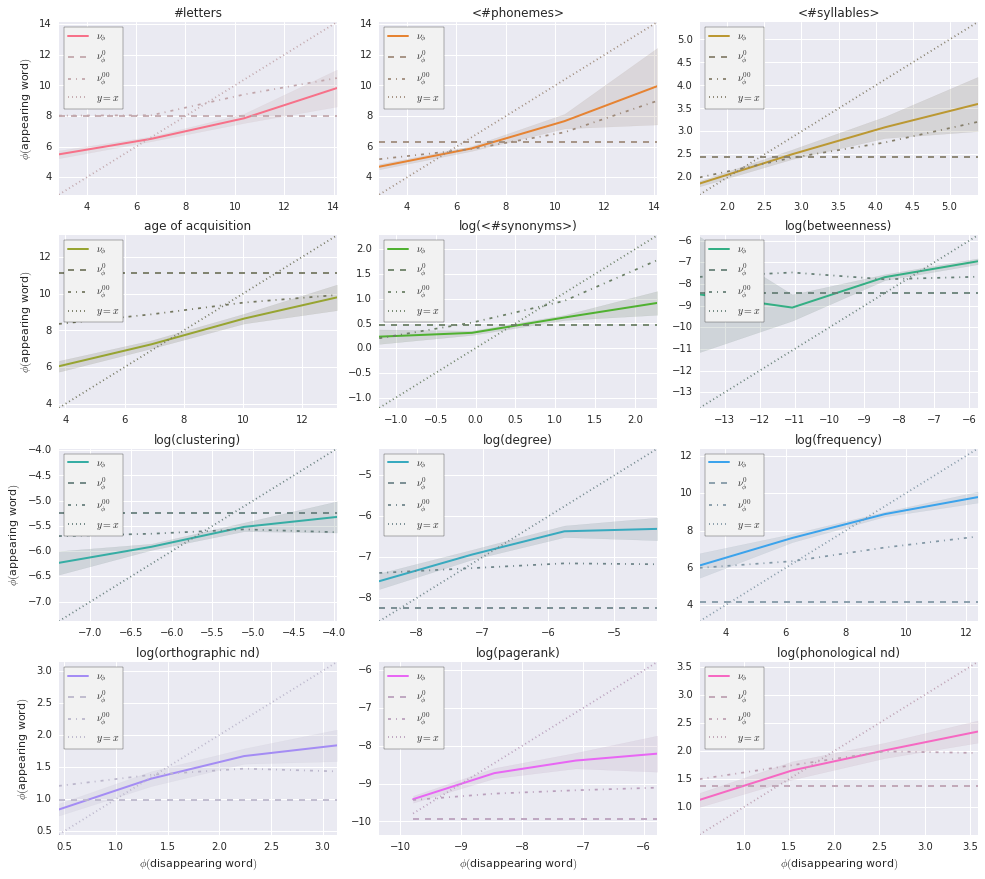

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

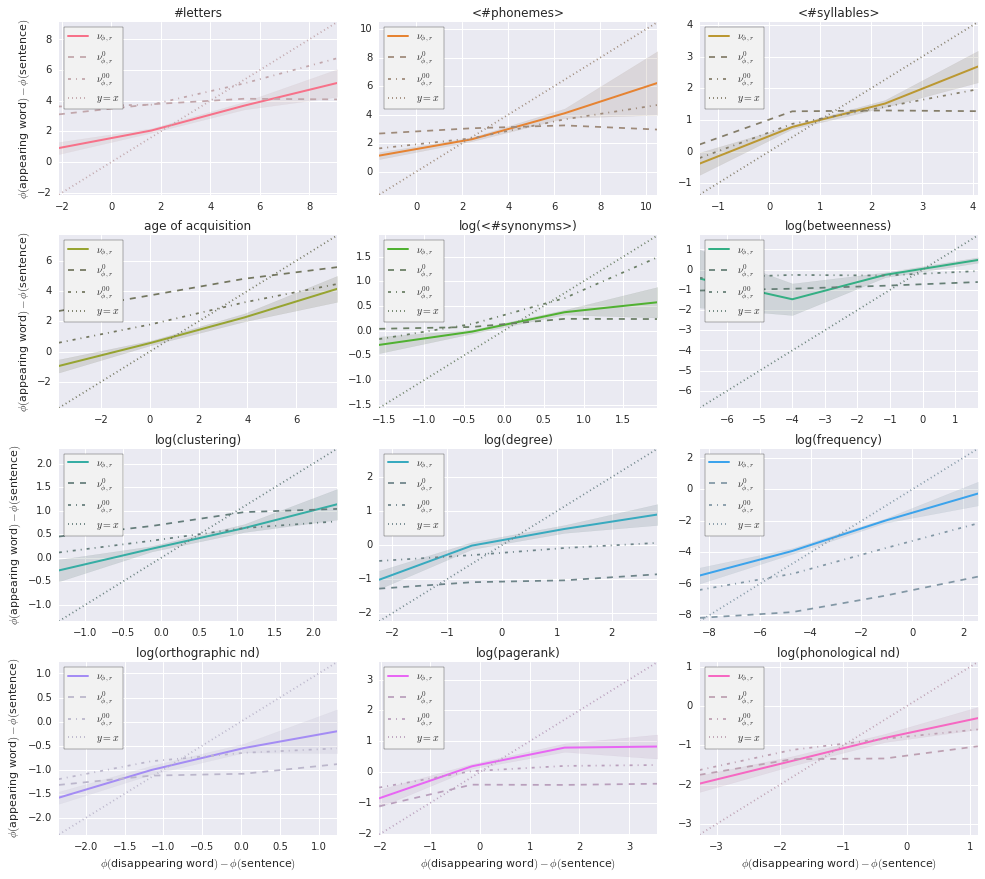

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

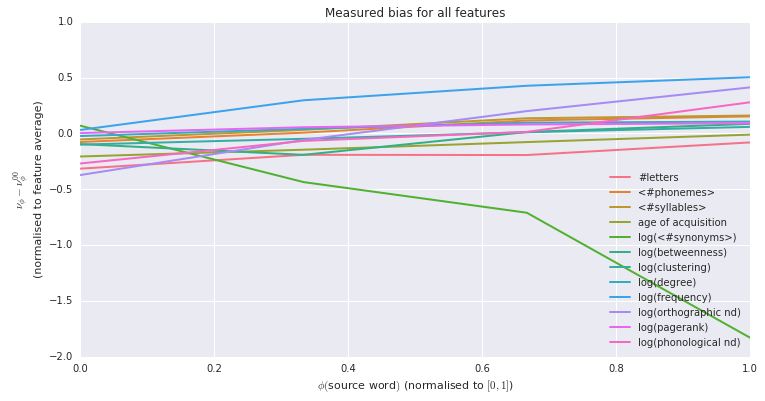

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

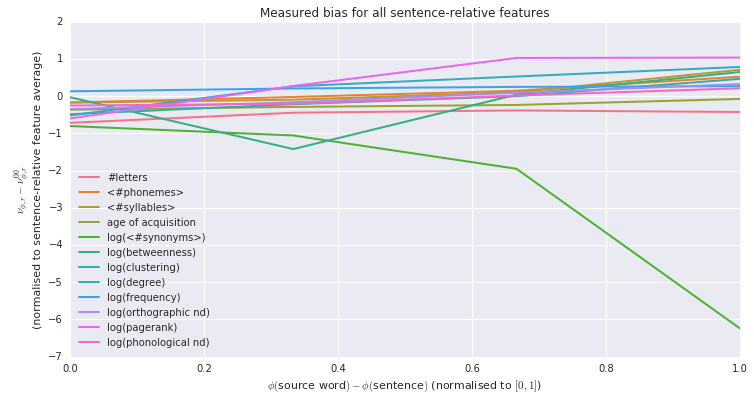

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

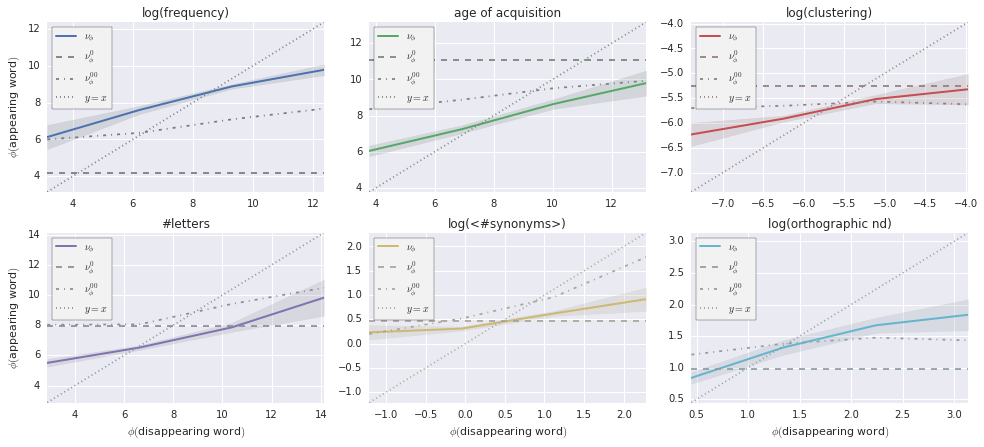

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

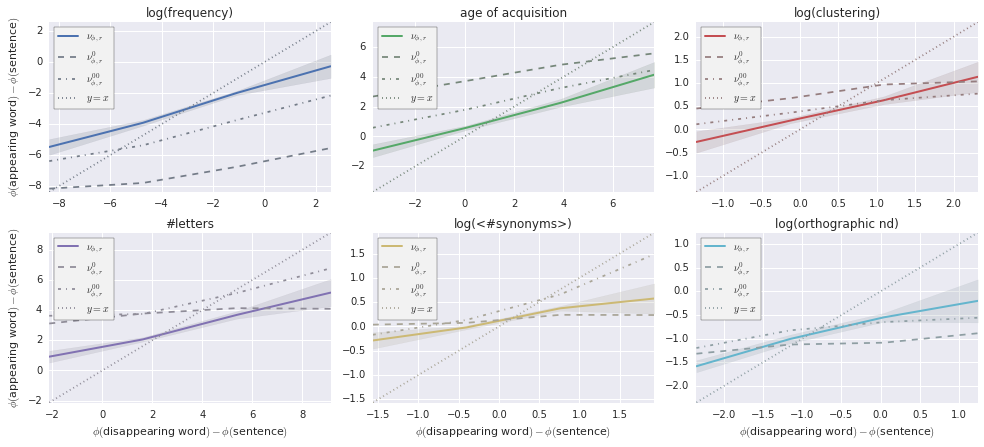

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

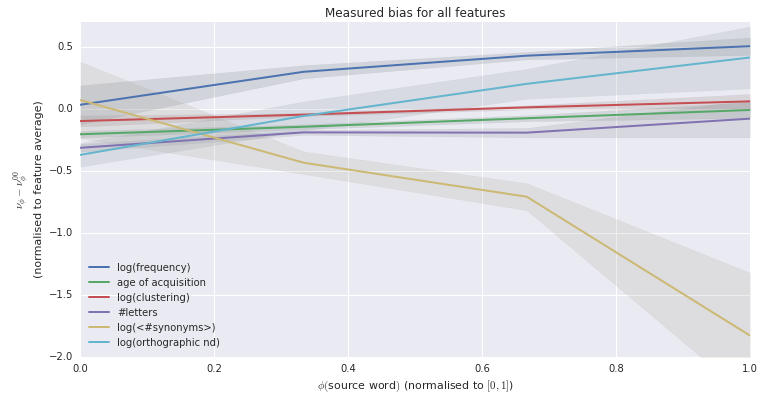

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

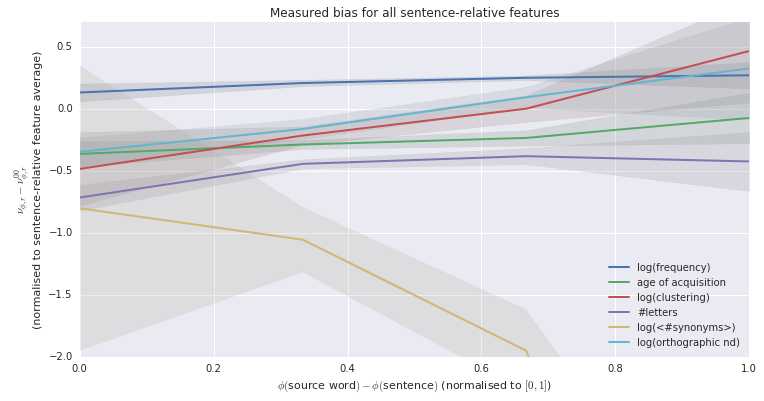

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


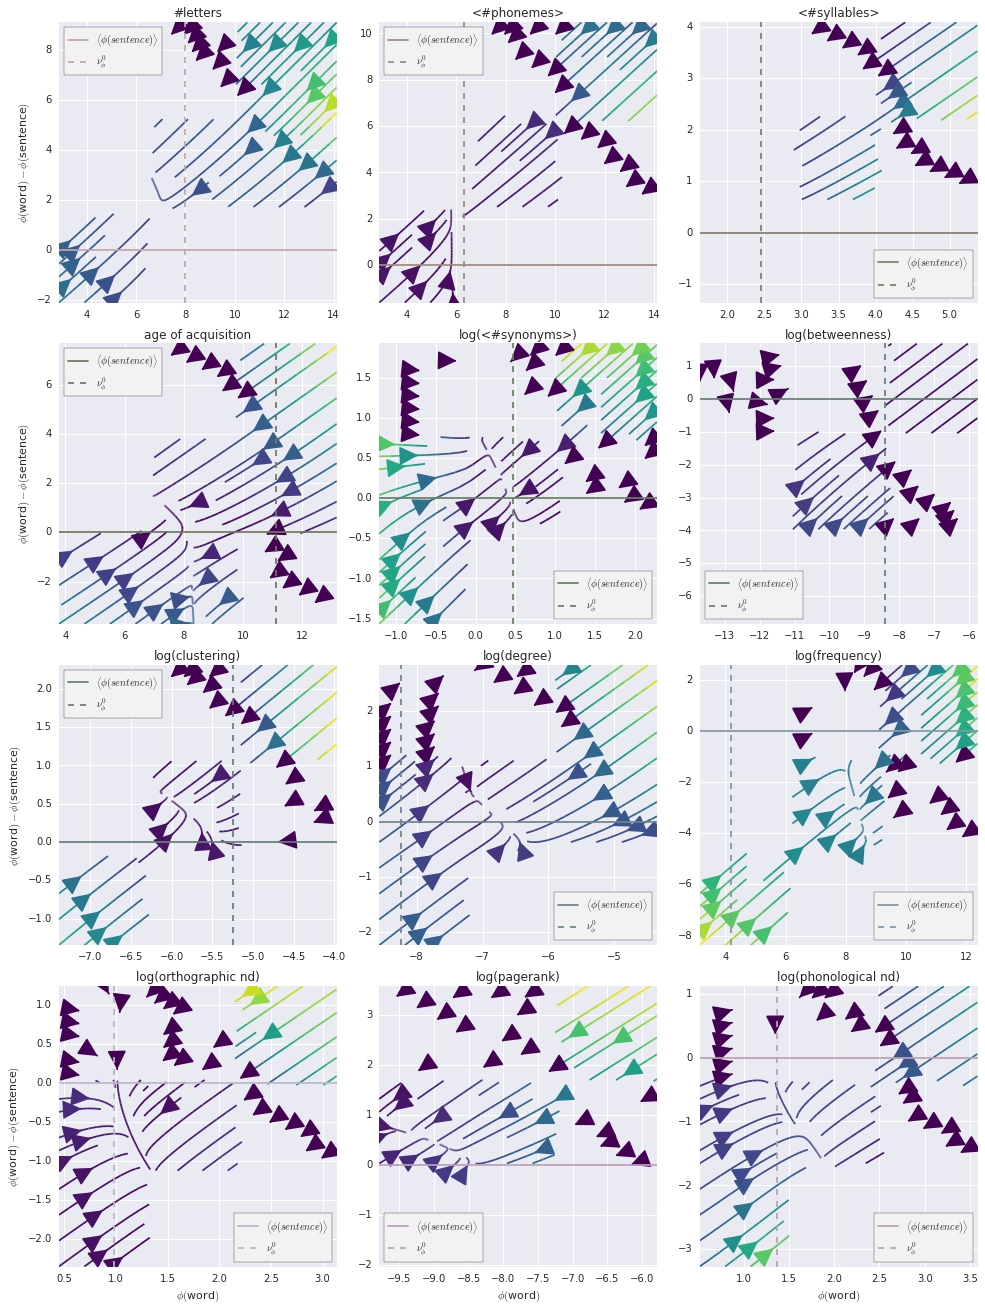

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


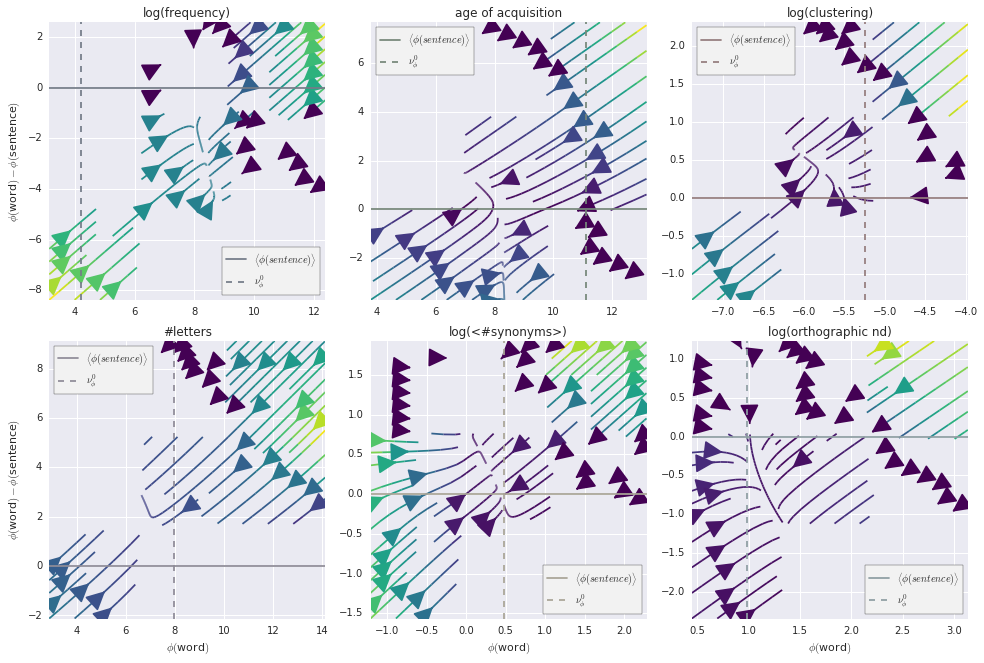

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55517435  0.17308968  0.07119239  0.0649652   0.03232099  0.02925818
  0.01982425  0.01781949  0.0152951   0.00881074]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.494798,0.214598,-0.075450,0.215818,0.224608,-0.460925,0.192716,0.249238,-0.436416,0.270498,-0.175942,0.010455
Component-1,0.375034,-0.405750,0.140462,-0.300364,-0.263332,-0.410655,0.138628,-0.292997,-0.428948,0.184581,-0.153455,0.010375
Component-2,0.653461,0.630962,-0.103698,0.215228,-0.192153,-0.126731,0.029076,0.221070,-0.053878,0.090286,-0.057136,-0.027908


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 39875) |          | Elapsed Time: 0:01:08 ETA:  31 days, 18:44:05

  0% (   56 of 39875) |                    | Elapsed Time: 0:01:09 ETA:  0:10:57

  0% (  129 of 39875) |                    | Elapsed Time: 0:01:10 ETA:  0:09:14

  0% (  202 of 39875) |                    | Elapsed Time: 0:01:11 ETA:  0:08:45

  0% (  268 of 39875) |                    | Elapsed Time: 0:01:12 ETA:  0:08:47

  0% (  340 of 39875) |                    | Elapsed Time: 0:01:13 ETA:  0:08:37

  1% (  418 of 39875) |                    | Elapsed Time: 0:01:14 ETA:  0:08:22

  1% (  499 of 39875) |                    | Elapsed Time: 0:01:15 ETA:  0:08:09

  1% (  564 of 39875) |                    | Elapsed Time: 0:01:16 ETA:  0:08:14

  1% (  629 of 39875) |                    | Elapsed Time: 0:01:17 ETA:  0:08:04

  1% (  696 of 39875) |                    | Elapsed Time: 0:01:18 ETA:  0:08:09

  1% (  758 of 39875) |                    | Elapsed Time: 0:01:19 ETA:  0:08:19

  2% (  823 of 39875) |                    | Elapsed Time: 0:01:20 ETA:  0:08:19

  2% (  894 of 39875) |                    | Elapsed Time: 0:01:21 ETA:  0:08:19

  2% (  965 of 39875) |                    | Elapsed Time: 0:01:22 ETA:  0:08:26

  2% (  997 of 39875) |                    | Elapsed Time: 0:01:23 ETA:  0:08:37

  2% ( 1075 of 39875) |                    | Elapsed Time: 0:01:24 ETA:  0:08:25

  2% ( 1157 of 39875) |                    | Elapsed Time: 0:01:25 ETA:  0:08:07

  3% ( 1242 of 39875) |                    | Elapsed Time: 0:01:26 ETA:  0:07:47

  3% ( 1325 of 39875) |                    | Elapsed Time: 0:01:27 ETA:  0:07:31

  3% ( 1414 of 39875) |                    | Elapsed Time: 0:01:28 ETA:  0:07:08

  3% ( 1496 of 39875) |                    | Elapsed Time: 0:01:29 ETA:  0:06:53

  3% ( 1590 of 39875) |                    | Elapsed Time: 0:01:30 ETA:  0:06:35

  4% ( 1696 of 39875) |                    | Elapsed Time: 0:01:31 ETA:  0:06:10

  4% ( 1799 of 39875) |                    | Elapsed Time: 0:01:32 ETA:  0:05:57

  4% ( 1897 of 39875) |                    | Elapsed Time: 0:01:33 ETA:  0:05:44

  5% ( 1994 of 39875) |#                   | Elapsed Time: 0:01:34 ETA:  0:05:32

  5% ( 2097 of 39875) |#                   | Elapsed Time: 0:01:35 ETA:  0:05:22

  5% ( 2210 of 39875) |#                   | Elapsed Time: 0:01:36 ETA:  0:05:07

  5% ( 2340 of 39875) |#                   | Elapsed Time: 0:01:37 ETA:  0:04:48

  6% ( 2493 of 39875) |#                   | Elapsed Time: 0:01:38 ETA:  0:04:21

  6% ( 2620 of 39875) |#                   | Elapsed Time: 0:01:39 ETA:  0:04:12

  6% ( 2732 of 39875) |#                   | Elapsed Time: 0:01:40 ETA:  0:04:07

  7% ( 2849 of 39875) |#                   | Elapsed Time: 0:01:41 ETA:  0:03:59

  7% ( 2960 of 39875) |#                   | Elapsed Time: 0:01:42 ETA:  0:03:56

  7% ( 2991 of 39875) |#                   | Elapsed Time: 0:01:42 ETA:  0:03:52

  7% ( 3060 of 39875) |#                   | Elapsed Time: 0:01:43 ETA:  0:04:09

  7% ( 3115 of 39875) |#                   | Elapsed Time: 0:01:44 ETA:  0:04:42

  7% ( 3165 of 39875) |#                   | Elapsed Time: 0:01:45 ETA:  0:05:25

  8% ( 3218 of 39875) |#                   | Elapsed Time: 0:01:46 ETA:  0:05:53

  8% ( 3275 of 39875) |#                   | Elapsed Time: 0:01:47 ETA:  0:06:41

  8% ( 3335 of 39875) |#                   | Elapsed Time: 0:01:48 ETA:  0:07:24

  8% ( 3394 of 39875) |#                   | Elapsed Time: 0:01:49 ETA:  0:08:22

  8% ( 3490 of 39875) |#                   | Elapsed Time: 0:01:50 ETA:  0:08:27

  9% ( 3611 of 39875) |#                   | Elapsed Time: 0:01:51 ETA:  0:07:40

  9% ( 3724 of 39875) |#                   | Elapsed Time: 0:01:52 ETA:  0:07:01

  9% ( 3837 of 39875) |#                   | Elapsed Time: 0:01:53 ETA:  0:06:17

  9% ( 3953 of 39875) |#                   | Elapsed Time: 0:01:54 ETA:  0:05:35

 10% ( 3988 of 39875) |##                  | Elapsed Time: 0:01:55 ETA:  0:05:07

 10% ( 4106 of 39875) |##                  | Elapsed Time: 0:01:56 ETA:  0:04:35

 10% ( 4225 of 39875) |##                  | Elapsed Time: 0:01:57 ETA:  0:04:08

 10% ( 4314 of 39875) |##                  | Elapsed Time: 0:01:58 ETA:  0:03:55

 11% ( 4429 of 39875) |##                  | Elapsed Time: 0:01:59 ETA:  0:03:53

 11% ( 4486 of 39875) |##                  | Elapsed Time: 0:01:59 ETA:  0:03:56

 11% ( 4608 of 39875) |##                  | Elapsed Time: 0:02:00 ETA:  0:03:51

 11% ( 4712 of 39875) |##                  | Elapsed Time: 0:02:01 ETA:  0:03:54

 12% ( 4817 of 39875) |##                  | Elapsed Time: 0:02:02 ETA:  0:03:57

 12% ( 4904 of 39875) |##                  | Elapsed Time: 0:02:03 ETA:  0:04:07

 12% ( 4985 of 39875) |##                  | Elapsed Time: 0:02:04 ETA:  0:04:18

 12% ( 5119 of 39875) |##                  | Elapsed Time: 0:02:05 ETA:  0:04:11

 13% ( 5210 of 39875) |##                  | Elapsed Time: 0:02:06 ETA:  0:04:09

 13% ( 5299 of 39875) |##                  | Elapsed Time: 0:02:07 ETA:  0:04:20

 13% ( 5389 of 39875) |##                  | Elapsed Time: 0:02:08 ETA:  0:04:27

 13% ( 5483 of 39875) |##                  | Elapsed Time: 0:02:09 ETA:  0:04:44

 13% ( 5558 of 39875) |##                  | Elapsed Time: 0:02:10 ETA:  0:04:59

 14% ( 5648 of 39875) |##                  | Elapsed Time: 0:02:11 ETA:  0:04:56

 14% ( 5739 of 39875) |##                  | Elapsed Time: 0:02:12 ETA:  0:04:54

 14% ( 5831 of 39875) |##                  | Elapsed Time: 0:02:13 ETA:  0:05:19

 14% ( 5925 of 39875) |##                  | Elapsed Time: 0:02:14 ETA:  0:05:16

 15% ( 5982 of 39875) |###                 | Elapsed Time: 0:02:15 ETA:  0:05:14

 15% ( 6072 of 39875) |###                 | Elapsed Time: 0:02:16 ETA:  0:05:14

 15% ( 6166 of 39875) |###                 | Elapsed Time: 0:02:17 ETA:  0:05:10

 15% ( 6259 of 39875) |###                 | Elapsed Time: 0:02:18 ETA:  0:05:07

 15% ( 6349 of 39875) |###                 | Elapsed Time: 0:02:19 ETA:  0:04:58

 16% ( 6436 of 39875) |###                 | Elapsed Time: 0:02:20 ETA:  0:04:59

 16% ( 6480 of 39875) |###                 | Elapsed Time: 0:02:20 ETA:  0:04:59

 16% ( 6569 of 39875) |###                 | Elapsed Time: 0:02:21 ETA:  0:05:00

 16% ( 6660 of 39875) |###                 | Elapsed Time: 0:02:22 ETA:  0:05:01

 16% ( 6750 of 39875) |###                 | Elapsed Time: 0:02:23 ETA:  0:05:00

 17% ( 6842 of 39875) |###                 | Elapsed Time: 0:02:24 ETA:  0:04:58

 17% ( 6931 of 39875) |###                 | Elapsed Time: 0:02:25 ETA:  0:05:00

 17% ( 6979 of 39875) |###                 | Elapsed Time: 0:02:26 ETA:  0:05:02

 17% ( 7070 of 39875) |###                 | Elapsed Time: 0:02:27 ETA:  0:05:00

 17% ( 7162 of 39875) |###                 | Elapsed Time: 0:02:28 ETA:  0:04:57

 18% ( 7253 of 39875) |###                 | Elapsed Time: 0:02:29 ETA:  0:04:55

 18% ( 7344 of 39875) |###                 | Elapsed Time: 0:02:30 ETA:  0:04:52

 18% ( 7438 of 39875) |###                 | Elapsed Time: 0:02:31 ETA:  0:04:49

 18% ( 7477 of 39875) |###                 | Elapsed Time: 0:02:31 ETA:  0:04:47

 18% ( 7568 of 39875) |###                 | Elapsed Time: 0:02:32 ETA:  0:04:46

 19% ( 7659 of 39875) |###                 | Elapsed Time: 0:02:33 ETA:  0:04:44

 19% ( 7748 of 39875) |###                 | Elapsed Time: 0:02:34 ETA:  0:04:43

 19% ( 7855 of 39875) |###                 | Elapsed Time: 0:02:35 ETA:  0:04:34

 20% ( 7975 of 39875) |####                | Elapsed Time: 0:02:37 ETA:  0:04:21

 20% ( 8078 of 39875) |####                | Elapsed Time: 0:02:38 ETA:  0:04:13

 20% ( 8171 of 39875) |####                | Elapsed Time: 0:02:39 ETA:  0:04:13

 20% ( 8274 of 39875) |####                | Elapsed Time: 0:02:40 ETA:  0:04:09

 20% ( 8372 of 39875) |####                | Elapsed Time: 0:02:41 ETA:  0:04:05

 21% ( 8474 of 39875) |####                | Elapsed Time: 0:02:41 ETA:  0:03:53

 21% ( 8578 of 39875) |####                | Elapsed Time: 0:02:43 ETA:  0:03:45

 21% ( 8681 of 39875) |####                | Elapsed Time: 0:02:44 ETA:  0:03:46

 22% ( 8780 of 39875) |####                | Elapsed Time: 0:02:45 ETA:  0:03:49

 22% ( 8876 of 39875) |####                | Elapsed Time: 0:02:46 ETA:  0:03:51

 22% ( 8972 of 39875) |####                | Elapsed Time: 0:02:46 ETA:  0:03:46

 22% ( 9079 of 39875) |####                | Elapsed Time: 0:02:47 ETA:  0:03:39

 22% ( 9170 of 39875) |####                | Elapsed Time: 0:02:48 ETA:  0:03:43

 23% ( 9283 of 39875) |####                | Elapsed Time: 0:02:49 ETA:  0:03:35

 23% ( 9392 of 39875) |####                | Elapsed Time: 0:02:50 ETA:  0:03:35

 23% ( 9471 of 39875) |####                | Elapsed Time: 0:02:51 ETA:  0:03:31

 24% ( 9573 of 39875) |####                | Elapsed Time: 0:02:52 ETA:  0:03:30

 24% ( 9684 of 39875) |####                | Elapsed Time: 0:02:53 ETA:  0:03:23

 24% ( 9794 of 39875) |####                | Elapsed Time: 0:02:54 ETA:  0:03:17

 24% ( 9907 of 39875) |####                | Elapsed Time: 0:02:55 ETA:  0:03:15

 25% ( 9969 of 39875) |#####               | Elapsed Time: 0:02:56 ETA:  0:03:16

 25% (10083 of 39875) |#####               | Elapsed Time: 0:02:57 ETA:  0:03:06

 25% (10206 of 39875) |#####               | Elapsed Time: 0:02:58 ETA:  0:03:01

 25% (10318 of 39875) |#####               | Elapsed Time: 0:02:59 ETA:  0:02:59

 26% (10430 of 39875) |#####               | Elapsed Time: 0:03:00 ETA:  0:02:59

 26% (10468 of 39875) |#####               | Elapsed Time: 0:03:00 ETA:  0:02:55

 26% (10564 of 39875) |#####               | Elapsed Time: 0:03:01 ETA:  0:03:00

 26% (10642 of 39875) |#####               | Elapsed Time: 0:03:02 ETA:  0:03:13

 26% (10729 of 39875) |#####               | Elapsed Time: 0:03:03 ETA:  0:03:24

 27% (10831 of 39875) |#####               | Elapsed Time: 0:03:04 ETA:  0:03:22

 27% (10941 of 39875) |#####               | Elapsed Time: 0:03:05 ETA:  0:03:23

 27% (10966 of 39875) |#####               | Elapsed Time: 0:03:05 ETA:  0:03:31

 27% (11066 of 39875) |#####               | Elapsed Time: 0:03:06 ETA:  0:03:36

 28% (11183 of 39875) |#####               | Elapsed Time: 0:03:07 ETA:  0:03:33

 28% (11302 of 39875) |#####               | Elapsed Time: 0:03:08 ETA:  0:03:24

 28% (11427 of 39875) |#####               | Elapsed Time: 0:03:09 ETA:  0:03:10

 28% (11465 of 39875) |#####               | Elapsed Time: 0:03:10 ETA:  0:02:54

 29% (11587 of 39875) |#####               | Elapsed Time: 0:03:11 ETA:  0:02:38

 29% (11713 of 39875) |#####               | Elapsed Time: 0:03:12 ETA:  0:02:27

 29% (11859 of 39875) |#####               | Elapsed Time: 0:03:13 ETA:  0:02:13

 30% (11963 of 39875) |######              | Elapsed Time: 0:03:14 ETA:  0:02:17

 30% (12050 of 39875) |######              | Elapsed Time: 0:03:15 ETA:  0:02:21

 30% (12130 of 39875) |######              | Elapsed Time: 0:03:16 ETA:  0:02:33

 30% (12217 of 39875) |######              | Elapsed Time: 0:03:17 ETA:  0:02:44

 30% (12324 of 39875) |######              | Elapsed Time: 0:03:18 ETA:  0:02:50

 31% (12461 of 39875) |######              | Elapsed Time: 0:03:19 ETA:  0:02:51

 31% (12569 of 39875) |######              | Elapsed Time: 0:03:20 ETA:  0:02:58

 31% (12681 of 39875) |######              | Elapsed Time: 0:03:21 ETA:  0:03:13

 32% (12784 of 39875) |######              | Elapsed Time: 0:03:22 ETA:  0:03:14

 32% (12877 of 39875) |######              | Elapsed Time: 0:03:23 ETA:  0:03:10

 32% (12960 of 39875) |######              | Elapsed Time: 0:03:24 ETA:  0:02:57

 32% (13087 of 39875) |######              | Elapsed Time: 0:03:25 ETA:  0:02:39

 33% (13191 of 39875) |######              | Elapsed Time: 0:03:26 ETA:  0:02:39

 33% (13305 of 39875) |######              | Elapsed Time: 0:03:27 ETA:  0:02:41

 33% (13421 of 39875) |######              | Elapsed Time: 0:03:28 ETA:  0:02:39

 33% (13458 of 39875) |######              | Elapsed Time: 0:03:28 ETA:  0:02:38

 34% (13582 of 39875) |######              | Elapsed Time: 0:03:29 ETA:  0:02:32

 34% (13720 of 39875) |######              | Elapsed Time: 0:03:30 ETA:  0:02:17

 34% (13830 of 39875) |######              | Elapsed Time: 0:03:31 ETA:  0:02:10

 35% (13957 of 39875) |#######             | Elapsed Time: 0:03:32 ETA:  0:02:11

 35% (14068 of 39875) |#######             | Elapsed Time: 0:03:33 ETA:  0:02:07

 35% (14201 of 39875) |#######             | Elapsed Time: 0:03:34 ETA:  0:01:59

 35% (14341 of 39875) |#######             | Elapsed Time: 0:03:35 ETA:  0:01:49

 36% (14455 of 39875) |#######             | Elapsed Time: 0:03:36 ETA:  0:01:41

 36% (14597 of 39875) |#######             | Elapsed Time: 0:03:37 ETA:  0:01:34

 36% (14721 of 39875) |#######             | Elapsed Time: 0:03:38 ETA:  0:01:37

 37% (14801 of 39875) |#######             | Elapsed Time: 0:03:39 ETA:  0:01:46

 37% (14891 of 39875) |#######             | Elapsed Time: 0:03:40 ETA:  0:01:52

 37% (14954 of 39875) |#######             | Elapsed Time: 0:03:41 ETA:  0:02:01

 37% (15046 of 39875) |#######             | Elapsed Time: 0:03:42 ETA:  0:02:07

 37% (15148 of 39875) |#######             | Elapsed Time: 0:03:43 ETA:  0:02:18

 38% (15276 of 39875) |#######             | Elapsed Time: 0:03:44 ETA:  0:02:22

 38% (15408 of 39875) |#######             | Elapsed Time: 0:03:45 ETA:  0:02:23

 38% (15452 of 39875) |#######             | Elapsed Time: 0:03:45 ETA:  0:02:38

 38% (15550 of 39875) |#######             | Elapsed Time: 0:03:46 ETA:  0:02:49

 39% (15665 of 39875) |#######             | Elapsed Time: 0:03:47 ETA:  0:02:32

 39% (15790 of 39875) |#######             | Elapsed Time: 0:03:48 ETA:  0:02:16

 39% (15902 of 39875) |#######             | Elapsed Time: 0:03:49 ETA:  0:02:06

 40% (15950 of 39875) |########            | Elapsed Time: 0:03:50 ETA:  0:02:03

 40% (16071 of 39875) |########            | Elapsed Time: 0:03:51 ETA:  0:01:54

 40% (16209 of 39875) |########            | Elapsed Time: 0:03:52 ETA:  0:01:49

 40% (16312 of 39875) |########            | Elapsed Time: 0:03:53 ETA:  0:01:59

 41% (16367 of 39875) |########            | Elapsed Time: 0:03:54 ETA:  0:02:20

 41% (16449 of 39875) |########            | Elapsed Time: 0:03:54 ETA:  0:02:15

 41% (16564 of 39875) |########            | Elapsed Time: 0:03:55 ETA:  0:02:14

 41% (16653 of 39875) |########            | Elapsed Time: 0:03:56 ETA:  0:02:29

 42% (16755 of 39875) |########            | Elapsed Time: 0:03:57 ETA:  0:02:32

 42% (16880 of 39875) |########            | Elapsed Time: 0:03:58 ETA:  0:02:19

 42% (16947 of 39875) |########            | Elapsed Time: 0:03:59 ETA:  0:02:22

 42% (17082 of 39875) |########            | Elapsed Time: 0:04:00 ETA:  0:02:23

 43% (17220 of 39875) |########            | Elapsed Time: 0:04:01 ETA:  0:02:07

 43% (17345 of 39875) |########            | Elapsed Time: 0:04:02 ETA:  0:01:39

 43% (17446 of 39875) |########            | Elapsed Time: 0:04:03 ETA:  0:01:36

 44% (17570 of 39875) |########            | Elapsed Time: 0:04:04 ETA:  0:01:32

 44% (17687 of 39875) |########            | Elapsed Time: 0:04:05 ETA:  0:01:21

 44% (17785 of 39875) |########            | Elapsed Time: 0:04:06 ETA:  0:01:22

 44% (17869 of 39875) |########            | Elapsed Time: 0:04:07 ETA:  0:01:34

 45% (17944 of 39875) |#########           | Elapsed Time: 0:04:08 ETA:  0:01:33

 45% (18064 of 39875) |#########           | Elapsed Time: 0:04:09 ETA:  0:01:38

 45% (18188 of 39875) |#########           | Elapsed Time: 0:04:10 ETA:  0:01:42

 45% (18299 of 39875) |#########           | Elapsed Time: 0:04:11 ETA:  0:01:46

 46% (18415 of 39875) |#########           | Elapsed Time: 0:04:12 ETA:  0:01:45

 46% (18443 of 39875) |#########           | Elapsed Time: 0:04:12 ETA:  0:01:50

 46% (18574 of 39875) |#########           | Elapsed Time: 0:04:13 ETA:  0:01:43

 46% (18667 of 39875) |#########           | Elapsed Time: 0:04:14 ETA:  0:01:44

 47% (18766 of 39875) |#########           | Elapsed Time: 0:04:15 ETA:  0:01:37

 47% (18874 of 39875) |#########           | Elapsed Time: 0:04:16 ETA:  0:01:38

 47% (18941 of 39875) |#########           | Elapsed Time: 0:04:16 ETA:  0:01:37

 47% (19057 of 39875) |#########           | Elapsed Time: 0:04:17 ETA:  0:01:39

 48% (19168 of 39875) |#########           | Elapsed Time: 0:04:18 ETA:  0:01:39

 48% (19264 of 39875) |#########           | Elapsed Time: 0:04:19 ETA:  0:01:46

 48% (19388 of 39875) |#########           | Elapsed Time: 0:04:20 ETA:  0:01:39

 48% (19440 of 39875) |#########           | Elapsed Time: 0:04:21 ETA:  0:01:44

 49% (19563 of 39875) |#########           | Elapsed Time: 0:04:22 ETA:  0:01:31

 49% (19687 of 39875) |#########           | Elapsed Time: 0:04:23 ETA:  0:01:20

 49% (19810 of 39875) |#########           | Elapsed Time: 0:04:24 ETA:  0:01:14

 49% (19907 of 39875) |#########           | Elapsed Time: 0:04:25 ETA:  0:01:22

 50% (19938 of 39875) |##########          | Elapsed Time: 0:04:25 ETA:  0:01:26

 50% (20034 of 39875) |##########          | Elapsed Time: 0:04:26 ETA:  0:01:31

 50% (20142 of 39875) |##########          | Elapsed Time: 0:04:27 ETA:  0:01:25

 50% (20251 of 39875) |##########          | Elapsed Time: 0:04:28 ETA:  0:01:30

 51% (20372 of 39875) |##########          | Elapsed Time: 0:04:29 ETA:  0:01:28

 51% (20436 of 39875) |##########          | Elapsed Time: 0:04:30 ETA:  0:01:31

 51% (20540 of 39875) |##########          | Elapsed Time: 0:04:31 ETA:  0:01:39

 51% (20638 of 39875) |##########          | Elapsed Time: 0:04:32 ETA:  0:01:49

 52% (20754 of 39875) |##########          | Elapsed Time: 0:04:33 ETA:  0:01:39

 52% (20872 of 39875) |##########          | Elapsed Time: 0:04:34 ETA:  0:01:32

 52% (20935 of 39875) |##########          | Elapsed Time: 0:04:34 ETA:  0:01:24

 52% (21042 of 39875) |##########          | Elapsed Time: 0:04:35 ETA:  0:01:24

 53% (21172 of 39875) |##########          | Elapsed Time: 0:04:36 ETA:  0:01:14

 53% (21257 of 39875) |##########          | Elapsed Time: 0:04:37 ETA:  0:01:28

 53% (21373 of 39875) |##########          | Elapsed Time: 0:04:38 ETA:  0:01:26

 53% (21433 of 39875) |##########          | Elapsed Time: 0:04:39 ETA:  0:01:24

 54% (21544 of 39875) |##########          | Elapsed Time: 0:04:40 ETA:  0:01:17

 54% (21659 of 39875) |##########          | Elapsed Time: 0:04:41 ETA:  0:01:17

 54% (21779 of 39875) |##########          | Elapsed Time: 0:04:42 ETA:  0:01:15

 54% (21896 of 39875) |##########          | Elapsed Time: 0:04:43 ETA:  0:01:13

 55% (21932 of 39875) |###########         | Elapsed Time: 0:04:43 ETA:  0:01:13

 55% (22019 of 39875) |###########         | Elapsed Time: 0:04:44 ETA:  0:01:31

 55% (22116 of 39875) |###########         | Elapsed Time: 0:04:45 ETA:  0:01:25

 55% (22223 of 39875) |###########         | Elapsed Time: 0:04:46 ETA:  0:01:27

 56% (22360 of 39875) |###########         | Elapsed Time: 0:04:47 ETA:  0:01:15

 56% (22430 of 39875) |###########         | Elapsed Time: 0:04:48 ETA:  0:01:15

 56% (22541 of 39875) |###########         | Elapsed Time: 0:04:49 ETA:  0:01:16

 56% (22652 of 39875) |###########         | Elapsed Time: 0:04:50 ETA:  0:01:19

 57% (22759 of 39875) |###########         | Elapsed Time: 0:04:51 ETA:  0:01:22

 57% (22884 of 39875) |###########         | Elapsed Time: 0:04:52 ETA:  0:01:12

 57% (22929 of 39875) |###########         | Elapsed Time: 0:04:52 ETA:  0:00:58

 57% (23055 of 39875) |###########         | Elapsed Time: 0:04:53 ETA:  0:00:46

 58% (23180 of 39875) |###########         | Elapsed Time: 0:04:54 ETA:  0:00:39

 58% (23294 of 39875) |###########         | Elapsed Time: 0:04:55 ETA:  0:00:46

 58% (23380 of 39875) |###########         | Elapsed Time: 0:04:56 ETA:  0:00:53

 58% (23427 of 39875) |###########         | Elapsed Time: 0:04:57 ETA:  0:00:56

 59% (23552 of 39875) |###########         | Elapsed Time: 0:04:58 ETA:  0:00:49

 59% (23690 of 39875) |###########         | Elapsed Time: 0:04:59 ETA:  0:00:37

 59% (23824 of 39875) |###########         | Elapsed Time: 0:05:00 ETA:  0:00:33

 60% (23925 of 39875) |############        | Elapsed Time: 0:05:01 ETA:  0:00:33

 60% (24059 of 39875) |############        | Elapsed Time: 0:05:02 ETA:  0:00:29

 60% (24171 of 39875) |############        | Elapsed Time: 0:05:03 ETA:  0:00:32

 60% (24280 of 39875) |############        | Elapsed Time: 0:05:04 ETA:  0:00:33

 61% (24392 of 39875) |############        | Elapsed Time: 0:05:05 ETA:  0:00:23

 61% (24424 of 39875) |############        | Elapsed Time: 0:05:05 ETA:  0:00:20

 61% (24539 of 39875) |############        | Elapsed Time: 0:05:06 ETA:  0:00:22

 61% (24685 of 39875) |############        | Elapsed Time: 0:05:07 ETA:  0:00:18

 62% (24821 of 39875) |############        | Elapsed Time: 0:05:08 ETA:  0:00:17

 62% (24922 of 39875) |############        | Elapsed Time: 0:05:09 ETA:  0:00:15

 62% (25038 of 39875) |############        | Elapsed Time: 0:05:10 ETA:  0:00:19

 63% (25158 of 39875) |############        | Elapsed Time: 0:05:11 ETA:  0:00:15

 63% (25283 of 39875) |############        | Elapsed Time: 0:05:12 ETA:  0:00:09

 63% (25400 of 39875) |############        | Elapsed Time: 0:05:13 ETA:  0:00:06

 63% (25421 of 39875) |############        | Elapsed Time: 0:05:13 ETA:  0:00:07

 64% (25522 of 39875) |############        | Elapsed Time: 0:05:14 ETA:  0:00:10

 64% (25623 of 39875) |############        | Elapsed Time: 0:05:15 ETA:  0:00:26

 64% (25744 of 39875) |############        | Elapsed Time: 0:05:16 ETA:  0:00:30

 64% (25866 of 39875) |############        | Elapsed Time: 0:05:17 ETA:  0:00:31

 65% (25919 of 39875) |#############       | Elapsed Time: 0:05:17 ETA:  0:00:29

 65% (26031 of 39875) |#############       | Elapsed Time: 0:05:18 ETA:  0:00:31

 65% (26142 of 39875) |#############       | Elapsed Time: 0:05:20 ETA:  0:00:36

 65% (26251 of 39875) |#############       | Elapsed Time: 0:05:21 ETA:  0:00:39

 66% (26358 of 39875) |#############       | Elapsed Time: 0:05:22 ETA:  0:00:38

 66% (26418 of 39875) |#############       | Elapsed Time: 0:05:22 ETA:  0:00:32

 66% (26515 of 39875) |#############       | Elapsed Time: 0:05:23 ETA:  0:00:33

 66% (26609 of 39875) |#############       | Elapsed Time: 0:05:24 ETA:  0:00:43

 67% (26720 of 39875) |#############       | Elapsed Time: 0:05:25 ETA:  0:00:47

 67% (26826 of 39875) |#############       | Elapsed Time: 0:05:26 ETA:  0:00:50

 67% (26873 of 39875) |#############       | Elapsed Time: 0:05:27 ETA:  0:01:19

 67% (26916 of 39875) |#############       | Elapsed Time: 0:05:28 ETA:  0:01:44

 67% (26965 of 39875) |#############       | Elapsed Time: 0:05:29 ETA:  0:02:19

 67% (27060 of 39875) |#############       | Elapsed Time: 0:05:30 ETA:  0:02:26

 68% (27173 of 39875) |#############       | Elapsed Time: 0:05:31 ETA:  0:02:17

 68% (27302 of 39875) |#############       | Elapsed Time: 0:05:32 ETA:  0:01:56

 68% (27415 of 39875) |#############       | Elapsed Time: 0:05:33 ETA:  0:02:00

 69% (27544 of 39875) |#############       | Elapsed Time: 0:05:34 ETA:  0:01:44

 69% (27667 of 39875) |#############       | Elapsed Time: 0:05:35 ETA:  0:01:01

 69% (27772 of 39875) |#############       | Elapsed Time: 0:05:36 ETA:  0:00:40

 70% (27913 of 39875) |##############      | Elapsed Time: 0:05:37 ETA:  0:00:01

 70% (28034 of 39875) |##############      | Elapsed Time: 0:05:38 ETA:  0:00:00

 70% (28147 of 39875) |##############      | Elapsed Time: 0:05:39 ETA:  0:00:03

 70% (28231 of 39875) |##############      | Elapsed Time: 0:05:40 ETA:  0:00:11

 71% (28327 of 39875) |##############      | Elapsed Time: 0:05:41 ETA:  0:00:17

 71% (28411 of 39875) |##############      | Elapsed Time: 0:05:42 ETA:  0:00:20

 71% (28516 of 39875) |##############      | Elapsed Time: 0:05:43 ETA:  0:00:27

 71% (28649 of 39875) |##############      | Elapsed Time: 0:05:44 ETA:  0:00:14

 72% (28732 of 39875) |##############      | Elapsed Time: 0:05:45 ETA:  0:00:31

 72% (28818 of 39875) |##############      | Elapsed Time: 0:05:46 ETA:  0:00:38

 72% (28910 of 39875) |##############      | Elapsed Time: 0:05:47 ETA:  0:00:39

 72% (29043 of 39875) |##############      | Elapsed Time: 0:05:48 ETA:  0:00:30

 73% (29167 of 39875) |##############      | Elapsed Time: 0:05:49 ETA:  0:00:12

 73% (29261 of 39875) |##############      | Elapsed Time: 0:05:50 ETA:  0:00:12

 73% (29378 of 39875) |##############      | Elapsed Time: 0:05:51 ETA:  0:00:12

 73% (29408 of 39875) |##############      | Elapsed Time: 0:05:51 ETA:  0:00:15

 73% (29502 of 39875) |##############      | Elapsed Time: 0:05:52 ETA:  0:00:31

 74% (29616 of 39875) |##############      | Elapsed Time: 0:05:53 ETA:  0:00:16

 74% (29717 of 39875) |##############      | Elapsed Time: 0:05:54 ETA:  0:00:09

 74% (29826 of 39875) |##############      | Elapsed Time: 0:05:55 ETA:  0:00:12

 75% (29907 of 39875) |###############     | Elapsed Time: 0:05:56 ETA:  0:00:24

 75% (30011 of 39875) |###############     | Elapsed Time: 0:05:57 ETA:  0:00:31

 75% (30120 of 39875) |###############     | Elapsed Time: 0:05:58 ETA:  0:00:24

 75% (30210 of 39875) |###############     | Elapsed Time: 0:05:59 ETA:  0:00:35

 76% (30310 of 39875) |###############     | Elapsed Time: 0:06:00 ETA:  0:00:30

 76% (30405 of 39875) |###############     | Elapsed Time: 0:06:01 ETA:  0:00:23

 76% (30511 of 39875) |###############     | Elapsed Time: 0:06:02 ETA:  0:00:25

 76% (30610 of 39875) |###############     | Elapsed Time: 0:06:03 ETA:  0:00:25

 77% (30748 of 39875) |###############     | Elapsed Time: 0:06:04 ETA:  0:00:12

 77% (30866 of 39875) |###############     | Elapsed Time: 0:06:05 ETA:  0:00:05

 77% (30904 of 39875) |###############     | Elapsed Time: 0:06:05 ETA:  0:00:05

 77% (31016 of 39875) |###############     | Elapsed Time: 0:06:06 ETA:  0:00:03

 78% (31121 of 39875) |###############     | Elapsed Time: 0:06:07 ETA:  0:00:00

 78% (31236 of 39875) |###############     | Elapsed Time: 0:06:08 ETA:  0:00:00

 78% (31328 of 39875) |###############     | Elapsed Time: 0:06:09 ETA:  0:00:00

 78% (31402 of 39875) |###############     | Elapsed Time: 0:06:10 ETA:  0:00:00

 79% (31536 of 39875) |###############     | Elapsed Time: 0:06:11 ETA:  0:00:00

 79% (31625 of 39875) |###############     | Elapsed Time: 0:06:12 ETA:  0:00:00

 79% (31723 of 39875) |###############     | Elapsed Time: 0:06:13 ETA:  0:00:01

 79% (31800 of 39875) |###############     | Elapsed Time: 0:06:14 ETA:  0:00:10

 80% (31900 of 39875) |################    | Elapsed Time: 0:06:15 ETA:  0:00:18

 80% (31991 of 39875) |################    | Elapsed Time: 0:06:16 ETA:  0:00:30

 80% (32112 of 39875) |################    | Elapsed Time: 0:06:17 ETA:  0:00:14

 80% (32232 of 39875) |################    | Elapsed Time: 0:06:18 ETA:  0:00:10

 81% (32351 of 39875) |################    | Elapsed Time: 0:06:19 ETA:  0:00:16

 81% (32399 of 39875) |################    | Elapsed Time: 0:06:19 ETA:  0:00:11

 81% (32517 of 39875) |################    | Elapsed Time: 0:06:20 ETA:  0:00:00

 81% (32606 of 39875) |################    | Elapsed Time: 0:06:21 ETA:  0:00:00

 81% (32681 of 39875) |################    | Elapsed Time: 0:06:22 ETA:  0:00:01

 82% (32798 of 39875) |################    | Elapsed Time: 0:06:23 ETA:  0:00:00

 82% (32897 of 39875) |################    | Elapsed Time: 0:06:24 ETA:  0:00:00

 82% (32957 of 39875) |################    | Elapsed Time: 0:06:25 ETA:  0:00:16

 82% (33020 of 39875) |################    | Elapsed Time: 0:06:26 ETA:  0:00:44

 82% (33095 of 39875) |################    | Elapsed Time: 0:06:27 ETA:  0:01:08

 83% (33198 of 39875) |################    | Elapsed Time: 0:06:28 ETA:  0:01:00

 83% (33325 of 39875) |################    | Elapsed Time: 0:06:29 ETA:  0:00:54

 83% (33396 of 39875) |################    | Elapsed Time: 0:06:30 ETA:  0:00:39

 83% (33493 of 39875) |################    | Elapsed Time: 0:06:31 ETA:  0:00:27

 84% (33561 of 39875) |################    | Elapsed Time: 0:06:32 ETA:  0:00:53

 84% (33664 of 39875) |################    | Elapsed Time: 0:06:33 ETA:  0:00:51

 84% (33762 of 39875) |################    | Elapsed Time: 0:06:34 ETA:  0:00:29

 84% (33861 of 39875) |################    | Elapsed Time: 0:06:35 ETA:  0:00:10

 85% (33894 of 39875) |#################   | Elapsed Time: 0:06:35 ETA:  0:00:00

 85% (33998 of 39875) |#################   | Elapsed Time: 0:06:36 ETA:  0:00:00

 85% (34085 of 39875) |#################   | Elapsed Time: 0:06:37 ETA:  0:00:15

 85% (34212 of 39875) |#################   | Elapsed Time: 0:06:38 ETA:  0:00:09

 86% (34318 of 39875) |#################   | Elapsed Time: 0:06:39 ETA:  0:00:03

 86% (34393 of 39875) |#################   | Elapsed Time: 0:06:40 ETA:  0:00:00

 86% (34507 of 39875) |#################   | Elapsed Time: 0:06:41 ETA:  0:00:00

 86% (34619 of 39875) |#################   | Elapsed Time: 0:06:42 ETA:  0:00:00

 87% (34727 of 39875) |#################   | Elapsed Time: 0:06:43 ETA:  0:00:00

 87% (34839 of 39875) |#################   | Elapsed Time: 0:06:44 ETA:  0:00:00

 87% (34891 of 39875) |#################   | Elapsed Time: 0:06:45 ETA:  0:00:00

 87% (35009 of 39875) |#################   | Elapsed Time: 0:06:46 ETA:  0:00:00

 88% (35134 of 39875) |#################   | Elapsed Time: 0:06:47 ETA:  0:00:00

 88% (35257 of 39875) |#################   | Elapsed Time: 0:06:48 ETA:  0:00:00

 88% (35390 of 39875) |#################   | Elapsed Time: 0:06:49 ETA:  0:00:00

 89% (35507 of 39875) |#################   | Elapsed Time: 0:06:50 ETA:  0:00:00

 89% (35633 of 39875) |#################   | Elapsed Time: 0:06:51 ETA:  0:00:00

 89% (35740 of 39875) |#################   | Elapsed Time: 0:06:52 ETA:  0:00:00

 89% (35850 of 39875) |#################   | Elapsed Time: 0:06:53 ETA:  0:00:00

 90% (35888 of 39875) |##################  | Elapsed Time: 0:06:53 ETA:  0:00:00

 90% (36010 of 39875) |##################  | Elapsed Time: 0:06:54 ETA:  0:00:00

 90% (36128 of 39875) |##################  | Elapsed Time: 0:06:55 ETA:  0:00:00

 90% (36216 of 39875) |##################  | Elapsed Time: 0:06:56 ETA:  0:00:00

 91% (36311 of 39875) |##################  | Elapsed Time: 0:06:57 ETA:  0:00:00

 91% (36386 of 39875) |##################  | Elapsed Time: 0:06:58 ETA:  0:00:00

 91% (36508 of 39875) |##################  | Elapsed Time: 0:06:59 ETA:  0:00:00

 91% (36639 of 39875) |##################  | Elapsed Time: 0:07:00 ETA:  0:00:00

 92% (36755 of 39875) |##################  | Elapsed Time: 0:07:01 ETA:  0:00:00

 92% (36834 of 39875) |##################  | Elapsed Time: 0:07:02 ETA:  0:00:00

 92% (36885 of 39875) |##################  | Elapsed Time: 0:07:02 ETA:  0:00:00

 92% (37009 of 39875) |##################  | Elapsed Time: 0:07:03 ETA:  0:00:00

 92% (37076 of 39875) |##################  | Elapsed Time: 0:07:04 ETA:  0:00:00

 93% (37197 of 39875) |##################  | Elapsed Time: 0:07:05 ETA:  0:00:00

 93% (37312 of 39875) |##################  | Elapsed Time: 0:07:06 ETA:  0:00:00

 93% (37383 of 39875) |##################  | Elapsed Time: 0:07:07 ETA:  0:00:00

 94% (37486 of 39875) |##################  | Elapsed Time: 0:07:08 ETA:  0:00:00

 94% (37586 of 39875) |##################  | Elapsed Time: 0:07:09 ETA:  0:00:00

 94% (37693 of 39875) |##################  | Elapsed Time: 0:07:10 ETA:  0:00:00

 94% (37811 of 39875) |##################  | Elapsed Time: 0:07:11 ETA:  0:00:00

 95% (37882 of 39875) |################### | Elapsed Time: 0:07:12 ETA:  0:00:00

 95% (37995 of 39875) |################### | Elapsed Time: 0:07:13 ETA:  0:00:00

 95% (38111 of 39875) |################### | Elapsed Time: 0:07:14 ETA:  0:00:00

 95% (38210 of 39875) |################### | Elapsed Time: 0:07:15 ETA:  0:00:00

 96% (38338 of 39875) |################### | Elapsed Time: 0:07:16 ETA:  0:00:00

 96% (38380 of 39875) |################### | Elapsed Time: 0:07:16 ETA:  0:00:00

 96% (38497 of 39875) |################### | Elapsed Time: 0:07:17 ETA:  0:00:00

 96% (38621 of 39875) |################### | Elapsed Time: 0:07:18 ETA:  0:00:00

 97% (38741 of 39875) |################### | Elapsed Time: 0:07:19 ETA:  0:00:00

 97% (38842 of 39875) |################### | Elapsed Time: 0:07:20 ETA:  0:00:00

 97% (38879 of 39875) |################### | Elapsed Time: 0:07:21 ETA:  0:00:00

 97% (38988 of 39875) |################### | Elapsed Time: 0:07:22 ETA:  0:00:00

 98% (39101 of 39875) |################### | Elapsed Time: 0:07:23 ETA:  0:00:00

 98% (39237 of 39875) |################### | Elapsed Time: 0:07:24 ETA:  0:00:00

 98% (39355 of 39875) |################### | Elapsed Time: 0:07:25 ETA:  0:00:00

 98% (39377 of 39875) |################### | Elapsed Time: 0:07:25 ETA:  0:00:00

 99% (39495 of 39875) |################### | Elapsed Time: 0:07:26 ETA:  0:00:00

 99% (39605 of 39875) |################### | Elapsed Time: 0:07:27 ETA:  0:00:00

 99% (39714 of 39875) |################### | Elapsed Time: 0:07:28 ETA:  0:00:00

 99% (39840 of 39875) |################### | Elapsed Time: 0:07:29 ETA:  0:00:00

100% (39875 of 39875) |####################| Elapsed Time: 0:07:29 Time: 0:07:29


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

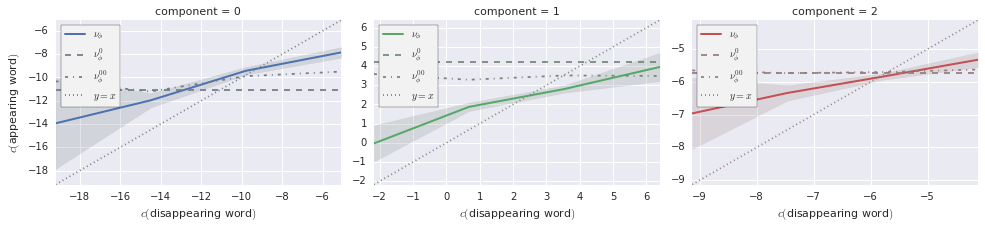

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.59973054  0.1771134   0.12332496]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.703647,-0.090509,0.311171,-0.581771,0.247744,0.005239
Component-1,0.469381,0.140486,-0.432266,-0.715736,0.246554,0.004935
Component-2,0.523574,-0.083373,0.830262,-0.166884,0.022629,-0.034971


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 39875) |            | Elapsed Time: 0:00:13 ETA:  6 days, 6:55:34

  0% (  109 of 39875) |                    | Elapsed Time: 0:00:14 ETA:  0:05:56

  0% (  228 of 39875) |                    | Elapsed Time: 0:00:15 ETA:  0:05:37

  0% (  351 of 39875) |                    | Elapsed Time: 0:00:16 ETA:  0:05:26

  1% (  499 of 39875) |                    | Elapsed Time: 0:00:17 ETA:  0:05:16

  1% (  611 of 39875) |                    | Elapsed Time: 0:00:18 ETA:  0:05:19

  1% (  726 of 39875) |                    | Elapsed Time: 0:00:19 ETA:  0:05:20

  2% (  836 of 39875) |                    | Elapsed Time: 0:00:20 ETA:  0:05:22

  2% (  955 of 39875) |                    | Elapsed Time: 0:00:21 ETA:  0:05:21

  2% (  997 of 39875) |                    | Elapsed Time: 0:00:22 ETA:  0:05:14

  2% ( 1124 of 39875) |                    | Elapsed Time: 0:00:23 ETA:  0:05:10

  3% ( 1247 of 39875) |                    | Elapsed Time: 0:00:24 ETA:  0:05:10

  3% ( 1379 of 39875) |                    | Elapsed Time: 0:00:25 ETA:  0:05:07

  3% ( 1496 of 39875) |                    | Elapsed Time: 0:00:26 ETA:  0:05:03

  4% ( 1615 of 39875) |                    | Elapsed Time: 0:00:27 ETA:  0:05:00

  4% ( 1730 of 39875) |                    | Elapsed Time: 0:00:28 ETA:  0:04:58

  4% ( 1848 of 39875) |                    | Elapsed Time: 0:00:29 ETA:  0:04:55

  4% ( 1967 of 39875) |                    | Elapsed Time: 0:00:30 ETA:  0:04:54

  5% ( 1994 of 39875) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:55

  5% ( 2120 of 39875) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:55

  5% ( 2237 of 39875) |#                   | Elapsed Time: 0:00:32 ETA:  0:04:56

  5% ( 2377 of 39875) |#                   | Elapsed Time: 0:00:33 ETA:  0:04:52

  6% ( 2493 of 39875) |#                   | Elapsed Time: 0:00:34 ETA:  0:04:49

  6% ( 2632 of 39875) |#                   | Elapsed Time: 0:00:35 ETA:  0:04:42

  6% ( 2776 of 39875) |#                   | Elapsed Time: 0:00:36 ETA:  0:04:32

  7% ( 2915 of 39875) |#                   | Elapsed Time: 0:00:37 ETA:  0:04:25

  7% ( 2991 of 39875) |#                   | Elapsed Time: 0:00:37 ETA:  0:04:22

  7% ( 3071 of 39875) |#                   | Elapsed Time: 0:00:38 ETA:  0:04:34

  7% ( 3144 of 39875) |#                   | Elapsed Time: 0:00:39 ETA:  0:04:49

  8% ( 3219 of 39875) |#                   | Elapsed Time: 0:00:40 ETA:  0:05:02

  8% ( 3299 of 39875) |#                   | Elapsed Time: 0:00:41 ETA:  0:05:23

  8% ( 3373 of 39875) |#                   | Elapsed Time: 0:00:42 ETA:  0:05:48

  8% ( 3490 of 39875) |#                   | Elapsed Time: 0:00:43 ETA:  0:05:56

  9% ( 3611 of 39875) |#                   | Elapsed Time: 0:00:44 ETA:  0:06:06

  9% ( 3742 of 39875) |#                   | Elapsed Time: 0:00:45 ETA:  0:06:09

  9% ( 3870 of 39875) |#                   | Elapsed Time: 0:00:46 ETA:  0:06:01

 10% ( 3988 of 39875) |##                  | Elapsed Time: 0:00:47 ETA:  0:05:42

 10% ( 4121 of 39875) |##                  | Elapsed Time: 0:00:48 ETA:  0:05:17

 10% ( 4249 of 39875) |##                  | Elapsed Time: 0:00:49 ETA:  0:04:57

 10% ( 4370 of 39875) |##                  | Elapsed Time: 0:00:50 ETA:  0:04:43

 11% ( 4486 of 39875) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:24

 11% ( 4633 of 39875) |##                  | Elapsed Time: 0:00:52 ETA:  0:04:16

 11% ( 4743 of 39875) |##                  | Elapsed Time: 0:00:53 ETA:  0:04:18

 12% ( 4845 of 39875) |##                  | Elapsed Time: 0:00:54 ETA:  0:04:26

 12% ( 4939 of 39875) |##                  | Elapsed Time: 0:00:55 ETA:  0:04:35

 12% ( 4985 of 39875) |##                  | Elapsed Time: 0:00:56 ETA:  0:04:37

 12% ( 5126 of 39875) |##                  | Elapsed Time: 0:00:57 ETA:  0:04:34

 13% ( 5236 of 39875) |##                  | Elapsed Time: 0:00:58 ETA:  0:04:39

 13% ( 5349 of 39875) |##                  | Elapsed Time: 0:00:59 ETA:  0:04:41

 13% ( 5455 of 39875) |##                  | Elapsed Time: 0:01:00 ETA:  0:04:49

 13% ( 5483 of 39875) |##                  | Elapsed Time: 0:01:00 ETA:  0:05:03

 14% ( 5590 of 39875) |##                  | Elapsed Time: 0:01:01 ETA:  0:05:03

 14% ( 5698 of 39875) |##                  | Elapsed Time: 0:01:02 ETA:  0:04:59

 14% ( 5800 of 39875) |##                  | Elapsed Time: 0:01:03 ETA:  0:04:54

 14% ( 5905 of 39875) |##                  | Elapsed Time: 0:01:04 ETA:  0:04:54

 15% ( 5982 of 39875) |###                 | Elapsed Time: 0:01:05 ETA:  0:05:07

 15% ( 6088 of 39875) |###                 | Elapsed Time: 0:01:06 ETA:  0:05:08

 15% ( 6200 of 39875) |###                 | Elapsed Time: 0:01:07 ETA:  0:05:07

 15% ( 6306 of 39875) |###                 | Elapsed Time: 0:01:08 ETA:  0:05:06

 16% ( 6407 of 39875) |###                 | Elapsed Time: 0:01:09 ETA:  0:05:08

 16% ( 6480 of 39875) |###                 | Elapsed Time: 0:01:09 ETA:  0:05:11

 16% ( 6588 of 39875) |###                 | Elapsed Time: 0:01:10 ETA:  0:05:10

 16% ( 6698 of 39875) |###                 | Elapsed Time: 0:01:11 ETA:  0:05:06

 17% ( 6807 of 39875) |###                 | Elapsed Time: 0:01:12 ETA:  0:05:03

 17% ( 6917 of 39875) |###                 | Elapsed Time: 0:01:13 ETA:  0:05:01

 17% ( 6979 of 39875) |###                 | Elapsed Time: 0:01:14 ETA:  0:05:06

 17% ( 7063 of 39875) |###                 | Elapsed Time: 0:01:15 ETA:  0:05:17

 17% ( 7164 of 39875) |###                 | Elapsed Time: 0:01:16 ETA:  0:05:19

 18% ( 7268 of 39875) |###                 | Elapsed Time: 0:01:17 ETA:  0:05:16

 18% ( 7375 of 39875) |###                 | Elapsed Time: 0:01:18 ETA:  0:05:11

 18% ( 7477 of 39875) |###                 | Elapsed Time: 0:01:19 ETA:  0:05:13

 19% ( 7582 of 39875) |###                 | Elapsed Time: 0:01:20 ETA:  0:05:14

 19% ( 7686 of 39875) |###                 | Elapsed Time: 0:01:21 ETA:  0:05:15

 19% ( 7790 of 39875) |###                 | Elapsed Time: 0:01:22 ETA:  0:05:17

 19% ( 7908 of 39875) |###                 | Elapsed Time: 0:01:23 ETA:  0:05:04

 20% ( 7975 of 39875) |####                | Elapsed Time: 0:01:24 ETA:  0:04:53

 20% ( 8097 of 39875) |####                | Elapsed Time: 0:01:25 ETA:  0:04:43

 20% ( 8202 of 39875) |####                | Elapsed Time: 0:01:26 ETA:  0:04:42

 20% ( 8301 of 39875) |####                | Elapsed Time: 0:01:27 ETA:  0:04:44

 21% ( 8397 of 39875) |####                | Elapsed Time: 0:01:28 ETA:  0:04:46

 21% ( 8474 of 39875) |####                | Elapsed Time: 0:01:28 ETA:  0:04:41

 21% ( 8590 of 39875) |####                | Elapsed Time: 0:01:29 ETA:  0:04:35

 21% ( 8707 of 39875) |####                | Elapsed Time: 0:01:30 ETA:  0:04:28

 22% ( 8834 of 39875) |####                | Elapsed Time: 0:01:31 ETA:  0:04:24

 22% ( 8972 of 39875) |####                | Elapsed Time: 0:01:33 ETA:  0:04:22

 22% ( 9087 of 39875) |####                | Elapsed Time: 0:01:34 ETA:  0:04:16

 23% ( 9190 of 39875) |####                | Elapsed Time: 0:01:35 ETA:  0:04:13

 23% ( 9308 of 39875) |####                | Elapsed Time: 0:01:36 ETA:  0:04:04

 23% ( 9425 of 39875) |####                | Elapsed Time: 0:01:37 ETA:  0:04:04

 23% ( 9471 of 39875) |####                | Elapsed Time: 0:01:37 ETA:  0:04:04

 24% ( 9577 of 39875) |####                | Elapsed Time: 0:01:38 ETA:  0:04:07

 24% ( 9675 of 39875) |####                | Elapsed Time: 0:01:39 ETA:  0:04:18

 24% ( 9788 of 39875) |####                | Elapsed Time: 0:01:40 ETA:  0:04:21

 24% ( 9897 of 39875) |####                | Elapsed Time: 0:01:41 ETA:  0:04:22

 25% ( 9969 of 39875) |#####               | Elapsed Time: 0:01:42 ETA:  0:04:24

 25% (10095 of 39875) |#####               | Elapsed Time: 0:01:43 ETA:  0:04:13

 25% (10227 of 39875) |#####               | Elapsed Time: 0:01:44 ETA:  0:04:07

 25% (10333 of 39875) |#####               | Elapsed Time: 0:01:45 ETA:  0:04:10

 26% (10416 of 39875) |#####               | Elapsed Time: 0:01:46 ETA:  0:04:20

 26% (10468 of 39875) |#####               | Elapsed Time: 0:01:46 ETA:  0:04:19

 26% (10565 of 39875) |#####               | Elapsed Time: 0:01:47 ETA:  0:04:18

 26% (10658 of 39875) |#####               | Elapsed Time: 0:01:48 ETA:  0:04:26

 26% (10758 of 39875) |#####               | Elapsed Time: 0:01:49 ETA:  0:04:29

 27% (10871 of 39875) |#####               | Elapsed Time: 0:01:50 ETA:  0:04:26

 27% (10966 of 39875) |#####               | Elapsed Time: 0:01:51 ETA:  0:04:26

 27% (11072 of 39875) |#####               | Elapsed Time: 0:01:52 ETA:  0:04:37

 28% (11208 of 39875) |#####               | Elapsed Time: 0:01:53 ETA:  0:04:23

 28% (11340 of 39875) |#####               | Elapsed Time: 0:01:54 ETA:  0:04:02

 28% (11465 of 39875) |#####               | Elapsed Time: 0:01:55 ETA:  0:03:53

 29% (11596 of 39875) |#####               | Elapsed Time: 0:01:56 ETA:  0:03:41

 29% (11724 of 39875) |#####               | Elapsed Time: 0:01:57 ETA:  0:03:28

 29% (11870 of 39875) |#####               | Elapsed Time: 0:01:58 ETA:  0:03:14

 30% (11963 of 39875) |######              | Elapsed Time: 0:01:59 ETA:  0:03:12

 30% (12057 of 39875) |######              | Elapsed Time: 0:02:00 ETA:  0:03:21

 30% (12153 of 39875) |######              | Elapsed Time: 0:02:01 ETA:  0:03:23

 30% (12253 of 39875) |######              | Elapsed Time: 0:02:02 ETA:  0:03:33

 31% (12383 of 39875) |######              | Elapsed Time: 0:02:03 ETA:  0:03:33

 31% (12461 of 39875) |######              | Elapsed Time: 0:02:03 ETA:  0:03:34

 31% (12578 of 39875) |######              | Elapsed Time: 0:02:04 ETA:  0:03:38

 31% (12698 of 39875) |######              | Elapsed Time: 0:02:05 ETA:  0:03:40

 32% (12815 of 39875) |######              | Elapsed Time: 0:02:06 ETA:  0:03:49

 32% (12917 of 39875) |######              | Elapsed Time: 0:02:07 ETA:  0:03:52

 32% (12960 of 39875) |######              | Elapsed Time: 0:02:08 ETA:  0:03:42

 32% (13099 of 39875) |######              | Elapsed Time: 0:02:09 ETA:  0:03:25

 33% (13216 of 39875) |######              | Elapsed Time: 0:02:10 ETA:  0:03:18

 33% (13347 of 39875) |######              | Elapsed Time: 0:02:11 ETA:  0:03:17

 33% (13458 of 39875) |######              | Elapsed Time: 0:02:12 ETA:  0:03:16

 34% (13592 of 39875) |######              | Elapsed Time: 0:02:13 ETA:  0:03:09

 34% (13734 of 39875) |######              | Elapsed Time: 0:02:14 ETA:  0:03:01

 34% (13857 of 39875) |######              | Elapsed Time: 0:02:15 ETA:  0:02:59

 35% (13957 of 39875) |#######             | Elapsed Time: 0:02:15 ETA:  0:02:52

 35% (14073 of 39875) |#######             | Elapsed Time: 0:02:16 ETA:  0:02:55

 35% (14218 of 39875) |#######             | Elapsed Time: 0:02:17 ETA:  0:02:52

 36% (14375 of 39875) |#######             | Elapsed Time: 0:02:18 ETA:  0:02:41

 36% (14455 of 39875) |#######             | Elapsed Time: 0:02:19 ETA:  0:02:37

 36% (14604 of 39875) |#######             | Elapsed Time: 0:02:20 ETA:  0:02:30

 36% (14735 of 39875) |#######             | Elapsed Time: 0:02:21 ETA:  0:02:30

 37% (14825 of 39875) |#######             | Elapsed Time: 0:02:22 ETA:  0:02:44

 37% (14954 of 39875) |#######             | Elapsed Time: 0:02:23 ETA:  0:02:45

 37% (15055 of 39875) |#######             | Elapsed Time: 0:02:24 ETA:  0:02:49

 38% (15174 of 39875) |#######             | Elapsed Time: 0:02:25 ETA:  0:02:56

 38% (15316 of 39875) |#######             | Elapsed Time: 0:02:26 ETA:  0:03:00

 38% (15452 of 39875) |#######             | Elapsed Time: 0:02:27 ETA:  0:03:17

 39% (15563 of 39875) |#######             | Elapsed Time: 0:02:28 ETA:  0:03:24

 39% (15683 of 39875) |#######             | Elapsed Time: 0:02:29 ETA:  0:03:11

 39% (15808 of 39875) |#######             | Elapsed Time: 0:02:30 ETA:  0:03:04

 39% (15928 of 39875) |#######             | Elapsed Time: 0:02:31 ETA:  0:03:02

 40% (15950 of 39875) |########            | Elapsed Time: 0:02:32 ETA:  0:02:58

 40% (16091 of 39875) |########            | Elapsed Time: 0:02:33 ETA:  0:02:49

 40% (16236 of 39875) |########            | Elapsed Time: 0:02:34 ETA:  0:02:47

 40% (16332 of 39875) |########            | Elapsed Time: 0:02:35 ETA:  0:02:55

 41% (16419 of 39875) |########            | Elapsed Time: 0:02:36 ETA:  0:03:04

 41% (16449 of 39875) |########            | Elapsed Time: 0:02:36 ETA:  0:02:59

 41% (16573 of 39875) |########            | Elapsed Time: 0:02:37 ETA:  0:02:57

 41% (16668 of 39875) |########            | Elapsed Time: 0:02:38 ETA:  0:03:08

 42% (16799 of 39875) |########            | Elapsed Time: 0:02:39 ETA:  0:03:02

 42% (16947 of 39875) |########            | Elapsed Time: 0:02:40 ETA:  0:03:04

 42% (17098 of 39875) |########            | Elapsed Time: 0:02:41 ETA:  0:03:01

 43% (17245 of 39875) |########            | Elapsed Time: 0:02:42 ETA:  0:02:41

 43% (17385 of 39875) |########            | Elapsed Time: 0:02:43 ETA:  0:02:22

 43% (17446 of 39875) |########            | Elapsed Time: 0:02:43 ETA:  0:02:22

 44% (17581 of 39875) |########            | Elapsed Time: 0:02:44 ETA:  0:02:18

 44% (17717 of 39875) |########            | Elapsed Time: 0:02:45 ETA:  0:02:05

 44% (17826 of 39875) |########            | Elapsed Time: 0:02:46 ETA:  0:02:10

 45% (17944 of 39875) |#########           | Elapsed Time: 0:02:47 ETA:  0:02:09

 45% (18083 of 39875) |#########           | Elapsed Time: 0:02:48 ETA:  0:02:06

 45% (18222 of 39875) |#########           | Elapsed Time: 0:02:49 ETA:  0:02:08

 46% (18360 of 39875) |#########           | Elapsed Time: 0:02:50 ETA:  0:02:10

 46% (18443 of 39875) |#########           | Elapsed Time: 0:02:51 ETA:  0:02:13

 46% (18584 of 39875) |#########           | Elapsed Time: 0:02:52 ETA:  0:02:09

 46% (18691 of 39875) |#########           | Elapsed Time: 0:02:53 ETA:  0:02:16

 47% (18806 of 39875) |#########           | Elapsed Time: 0:02:54 ETA:  0:02:21

 47% (18941 of 39875) |#########           | Elapsed Time: 0:02:55 ETA:  0:02:12

 47% (19074 of 39875) |#########           | Elapsed Time: 0:02:56 ETA:  0:02:09

 48% (19216 of 39875) |#########           | Elapsed Time: 0:02:57 ETA:  0:02:08

 48% (19330 of 39875) |#########           | Elapsed Time: 0:02:58 ETA:  0:02:14

 48% (19440 of 39875) |#########           | Elapsed Time: 0:02:59 ETA:  0:02:13

 49% (19546 of 39875) |#########           | Elapsed Time: 0:03:00 ETA:  0:02:17

 49% (19670 of 39875) |#########           | Elapsed Time: 0:03:01 ETA:  0:02:21

 49% (19811 of 39875) |#########           | Elapsed Time: 0:03:02 ETA:  0:02:11

 50% (19938 of 39875) |##########          | Elapsed Time: 0:03:03 ETA:  0:02:16

 50% (20069 of 39875) |##########          | Elapsed Time: 0:03:04 ETA:  0:02:15

 50% (20208 of 39875) |##########          | Elapsed Time: 0:03:05 ETA:  0:02:15

 51% (20338 of 39875) |##########          | Elapsed Time: 0:03:06 ETA:  0:02:09

 51% (20436 of 39875) |##########          | Elapsed Time: 0:03:07 ETA:  0:02:10

 51% (20554 of 39875) |##########          | Elapsed Time: 0:03:08 ETA:  0:02:06

 51% (20663 of 39875) |##########          | Elapsed Time: 0:03:09 ETA:  0:02:10

 52% (20797 of 39875) |##########          | Elapsed Time: 0:03:10 ETA:  0:02:11

 52% (20935 of 39875) |##########          | Elapsed Time: 0:03:11 ETA:  0:02:02

 52% (21063 of 39875) |##########          | Elapsed Time: 0:03:12 ETA:  0:02:02

 53% (21205 of 39875) |##########          | Elapsed Time: 0:03:13 ETA:  0:02:00

 53% (21321 of 39875) |##########          | Elapsed Time: 0:03:14 ETA:  0:02:03

 53% (21433 of 39875) |##########          | Elapsed Time: 0:03:15 ETA:  0:02:06

 54% (21559 of 39875) |##########          | Elapsed Time: 0:03:16 ETA:  0:02:02

 54% (21688 of 39875) |##########          | Elapsed Time: 0:03:17 ETA:  0:01:55

 54% (21829 of 39875) |##########          | Elapsed Time: 0:03:18 ETA:  0:01:52

 55% (21932 of 39875) |###########         | Elapsed Time: 0:03:19 ETA:  0:01:53

 55% (22041 of 39875) |###########         | Elapsed Time: 0:03:20 ETA:  0:01:58

 55% (22160 of 39875) |###########         | Elapsed Time: 0:03:21 ETA:  0:01:59

 55% (22300 of 39875) |###########         | Elapsed Time: 0:03:22 ETA:  0:01:59

 56% (22430 of 39875) |###########         | Elapsed Time: 0:03:23 ETA:  0:01:53

 56% (22556 of 39875) |###########         | Elapsed Time: 0:03:24 ETA:  0:01:50

 56% (22674 of 39875) |###########         | Elapsed Time: 0:03:25 ETA:  0:01:51

 57% (22802 of 39875) |###########         | Elapsed Time: 0:03:26 ETA:  0:01:51

 57% (22929 of 39875) |###########         | Elapsed Time: 0:03:27 ETA:  0:01:49

 57% (23079 of 39875) |###########         | Elapsed Time: 0:03:28 ETA:  0:01:40

 58% (23226 of 39875) |###########         | Elapsed Time: 0:03:29 ETA:  0:01:29

 58% (23348 of 39875) |###########         | Elapsed Time: 0:03:30 ETA:  0:01:28

 58% (23427 of 39875) |###########         | Elapsed Time: 0:03:30 ETA:  0:01:34

 59% (23566 of 39875) |###########         | Elapsed Time: 0:03:31 ETA:  0:01:31

 59% (23709 of 39875) |###########         | Elapsed Time: 0:03:32 ETA:  0:01:26

 59% (23850 of 39875) |###########         | Elapsed Time: 0:03:33 ETA:  0:01:19

 60% (23925 of 39875) |############        | Elapsed Time: 0:03:34 ETA:  0:01:16

 60% (24062 of 39875) |############        | Elapsed Time: 0:03:35 ETA:  0:01:17

 60% (24182 of 39875) |############        | Elapsed Time: 0:03:36 ETA:  0:01:24

 60% (24305 of 39875) |############        | Elapsed Time: 0:03:37 ETA:  0:01:30

 61% (24424 of 39875) |############        | Elapsed Time: 0:03:38 ETA:  0:01:29

 61% (24553 of 39875) |############        | Elapsed Time: 0:03:39 ETA:  0:01:24

 61% (24709 of 39875) |############        | Elapsed Time: 0:03:40 ETA:  0:01:18

 62% (24752 of 39875) |############        | Elapsed Time: 0:03:46 ETA:  0:05:12

 62% (24889 of 39875) |############        | Elapsed Time: 0:03:47 ETA:  0:05:13

 62% (24922 of 39875) |############        | Elapsed Time: 0:03:48 ETA:  0:05:24

 62% (25048 of 39875) |############        | Elapsed Time: 0:03:49 ETA:  0:05:29

 63% (25181 of 39875) |############        | Elapsed Time: 0:03:50 ETA:  0:05:21

 63% (25312 of 39875) |############        | Elapsed Time: 0:03:51 ETA:  0:05:15

 63% (25421 of 39875) |############        | Elapsed Time: 0:03:52 ETA:  0:05:15

 64% (25541 of 39875) |############        | Elapsed Time: 0:03:53 ETA:  0:05:19

 64% (25656 of 39875) |############        | Elapsed Time: 0:03:54 ETA:  0:05:42

 64% (25791 of 39875) |############        | Elapsed Time: 0:03:55 ETA:  0:01:17

 65% (25919 of 39875) |#############       | Elapsed Time: 0:03:56 ETA:  0:01:19

 65% (26039 of 39875) |#############       | Elapsed Time: 0:03:57 ETA:  0:01:20

 65% (26155 of 39875) |#############       | Elapsed Time: 0:03:58 ETA:  0:01:22

 65% (26274 of 39875) |#############       | Elapsed Time: 0:03:59 ETA:  0:01:25

 66% (26418 of 39875) |#############       | Elapsed Time: 0:04:00 ETA:  0:01:28

 66% (26522 of 39875) |#############       | Elapsed Time: 0:04:01 ETA:  0:01:33

 66% (26632 of 39875) |#############       | Elapsed Time: 0:04:02 ETA:  0:01:34

 67% (26749 of 39875) |#############       | Elapsed Time: 0:04:03 ETA:  0:01:39

 67% (26845 of 39875) |#############       | Elapsed Time: 0:04:04 ETA:  0:01:50

 67% (26916 of 39875) |#############       | Elapsed Time: 0:04:05 ETA:  0:02:25

 67% (26980 of 39875) |#############       | Elapsed Time: 0:04:06 ETA:  0:02:54

 67% (27094 of 39875) |#############       | Elapsed Time: 0:04:07 ETA:  0:02:57

 68% (27216 of 39875) |#############       | Elapsed Time: 0:04:08 ETA:  0:02:44

 68% (27339 of 39875) |#############       | Elapsed Time: 0:04:09 ETA:  0:02:32

 68% (27415 of 39875) |#############       | Elapsed Time: 0:04:10 ETA:  0:02:30

 69% (27543 of 39875) |#############       | Elapsed Time: 0:04:11 ETA:  0:02:23

 69% (27662 of 39875) |#############       | Elapsed Time: 0:04:12 ETA:  0:02:11

 69% (27775 of 39875) |#############       | Elapsed Time: 0:04:13 ETA:  0:01:47

 70% (27913 of 39875) |##############      | Elapsed Time: 0:04:14 ETA:  0:01:14

 70% (28039 of 39875) |##############      | Elapsed Time: 0:04:15 ETA:  0:01:09

 70% (28156 of 39875) |##############      | Elapsed Time: 0:04:16 ETA:  0:01:10

 70% (28255 of 39875) |##############      | Elapsed Time: 0:04:17 ETA:  0:01:17

 71% (28376 of 39875) |##############      | Elapsed Time: 0:04:18 ETA:  0:01:17

 71% (28411 of 39875) |##############      | Elapsed Time: 0:04:18 ETA:  0:01:20

 71% (28516 of 39875) |##############      | Elapsed Time: 0:04:19 ETA:  0:01:25

 71% (28640 of 39875) |##############      | Elapsed Time: 0:04:20 ETA:  0:01:19

 72% (28731 of 39875) |##############      | Elapsed Time: 0:04:21 ETA:  0:01:36

 72% (28838 of 39875) |##############      | Elapsed Time: 0:04:22 ETA:  0:01:37

 72% (28910 of 39875) |##############      | Elapsed Time: 0:04:23 ETA:  0:01:38

 72% (29050 of 39875) |##############      | Elapsed Time: 0:04:24 ETA:  0:01:28

 73% (29185 of 39875) |##############      | Elapsed Time: 0:04:25 ETA:  0:01:13

 73% (29292 of 39875) |##############      | Elapsed Time: 0:04:26 ETA:  0:01:17

 73% (29408 of 39875) |##############      | Elapsed Time: 0:04:27 ETA:  0:01:14

 74% (29515 of 39875) |##############      | Elapsed Time: 0:04:28 ETA:  0:01:20

 74% (29643 of 39875) |##############      | Elapsed Time: 0:04:29 ETA:  0:01:04

 74% (29766 of 39875) |##############      | Elapsed Time: 0:04:30 ETA:  0:00:57

 75% (29907 of 39875) |###############     | Elapsed Time: 0:04:31 ETA:  0:01:03

 75% (30031 of 39875) |###############     | Elapsed Time: 0:04:32 ETA:  0:01:06

 75% (30146 of 39875) |###############     | Elapsed Time: 0:04:33 ETA:  0:01:01

 75% (30269 of 39875) |###############     | Elapsed Time: 0:04:34 ETA:  0:00:55

 76% (30377 of 39875) |###############     | Elapsed Time: 0:04:35 ETA:  0:00:59

 76% (30405 of 39875) |###############     | Elapsed Time: 0:04:35 ETA:  0:00:53

 76% (30520 of 39875) |###############     | Elapsed Time: 0:04:36 ETA:  0:00:57

 76% (30650 of 39875) |###############     | Elapsed Time: 0:04:37 ETA:  0:00:53

 77% (30783 of 39875) |###############     | Elapsed Time: 0:04:38 ETA:  0:00:51

 77% (30904 of 39875) |###############     | Elapsed Time: 0:04:39 ETA:  0:00:51

 77% (31016 of 39875) |###############     | Elapsed Time: 0:04:40 ETA:  0:00:51

 78% (31131 of 39875) |###############     | Elapsed Time: 0:04:41 ETA:  0:00:54

 78% (31259 of 39875) |###############     | Elapsed Time: 0:04:42 ETA:  0:00:45

 78% (31402 of 39875) |###############     | Elapsed Time: 0:04:43 ETA:  0:00:43

 79% (31543 of 39875) |###############     | Elapsed Time: 0:04:44 ETA:  0:00:38

 79% (31650 of 39875) |###############     | Elapsed Time: 0:04:45 ETA:  0:00:47

 79% (31761 of 39875) |###############     | Elapsed Time: 0:04:46 ETA:  0:00:50

 79% (31847 of 39875) |###############     | Elapsed Time: 0:04:47 ETA:  0:01:00

 80% (31900 of 39875) |################    | Elapsed Time: 0:04:48 ETA:  0:00:53

 80% (32006 of 39875) |################    | Elapsed Time: 0:04:49 ETA:  0:00:56

 80% (32138 of 39875) |################    | Elapsed Time: 0:04:50 ETA:  0:00:54

 80% (32263 of 39875) |################    | Elapsed Time: 0:04:51 ETA:  0:00:49

 81% (32399 of 39875) |################    | Elapsed Time: 0:04:52 ETA:  0:00:58

 81% (32534 of 39875) |################    | Elapsed Time: 0:04:53 ETA:  0:00:46

 81% (32634 of 39875) |################    | Elapsed Time: 0:04:54 ETA:  0:00:49

 82% (32738 of 39875) |################    | Elapsed Time: 0:04:55 ETA:  0:00:41

 82% (32869 of 39875) |################    | Elapsed Time: 0:04:56 ETA:  0:00:40

 82% (32897 of 39875) |################    | Elapsed Time: 0:04:56 ETA:  0:00:38

 82% (32974 of 39875) |################    | Elapsed Time: 0:04:57 ETA:  0:00:58

 82% (33072 of 39875) |################    | Elapsed Time: 0:04:58 ETA:  0:01:10

 83% (33186 of 39875) |################    | Elapsed Time: 0:04:59 ETA:  0:01:14

 83% (33315 of 39875) |################    | Elapsed Time: 0:05:00 ETA:  0:01:02

 83% (33396 of 39875) |################    | Elapsed Time: 0:05:01 ETA:  0:01:06

 84% (33515 of 39875) |################    | Elapsed Time: 0:05:02 ETA:  0:00:56

 84% (33597 of 39875) |################    | Elapsed Time: 0:05:03 ETA:  0:01:05

 84% (33708 of 39875) |################    | Elapsed Time: 0:05:04 ETA:  0:01:12

 84% (33840 of 39875) |################    | Elapsed Time: 0:05:05 ETA:  0:00:59

 85% (33894 of 39875) |#################   | Elapsed Time: 0:05:05 ETA:  0:00:46

 85% (34021 of 39875) |#################   | Elapsed Time: 0:05:06 ETA:  0:00:34

 85% (34143 of 39875) |#################   | Elapsed Time: 0:05:07 ETA:  0:00:30

 85% (34272 of 39875) |#################   | Elapsed Time: 0:05:08 ETA:  0:00:29

 86% (34393 of 39875) |#################   | Elapsed Time: 0:05:09 ETA:  0:00:32

 86% (34517 of 39875) |#################   | Elapsed Time: 0:05:10 ETA:  0:00:16

 86% (34653 of 39875) |#################   | Elapsed Time: 0:05:11 ETA:  0:00:06

 87% (34777 of 39875) |#################   | Elapsed Time: 0:05:12 ETA:  0:00:08

 87% (34891 of 39875) |#################   | Elapsed Time: 0:05:13 ETA:  0:00:03

 87% (35023 of 39875) |#################   | Elapsed Time: 0:05:14 ETA:  0:00:01

 88% (35157 of 39875) |#################   | Elapsed Time: 0:05:15 ETA:  0:00:00

 88% (35292 of 39875) |#################   | Elapsed Time: 0:05:16 ETA:  0:00:00

 88% (35390 of 39875) |#################   | Elapsed Time: 0:05:17 ETA:  0:00:00

 89% (35516 of 39875) |#################   | Elapsed Time: 0:05:18 ETA:  0:00:00

 89% (35663 of 39875) |#################   | Elapsed Time: 0:05:19 ETA:  0:00:00

 89% (35768 of 39875) |#################   | Elapsed Time: 0:05:20 ETA:  0:00:00

 89% (35864 of 39875) |#################   | Elapsed Time: 0:05:21 ETA:  0:00:00

 90% (35888 of 39875) |##################  | Elapsed Time: 0:05:21 ETA:  0:00:00

 90% (35980 of 39875) |##################  | Elapsed Time: 0:05:22 ETA:  0:00:12

 90% (36083 of 39875) |##################  | Elapsed Time: 0:05:23 ETA:  0:00:22

 90% (36171 of 39875) |##################  | Elapsed Time: 0:05:24 ETA:  0:00:39

 91% (36290 of 39875) |##################  | Elapsed Time: 0:05:25 ETA:  0:00:45

 91% (36386 of 39875) |##################  | Elapsed Time: 0:05:26 ETA:  0:00:46

 91% (36517 of 39875) |##################  | Elapsed Time: 0:05:27 ETA:  0:00:52

 91% (36658 of 39875) |##################  | Elapsed Time: 0:05:28 ETA:  0:00:36

 92% (36783 of 39875) |##################  | Elapsed Time: 0:05:29 ETA:  0:00:23

 92% (36885 of 39875) |##################  | Elapsed Time: 0:05:30 ETA:  0:00:18

 92% (37008 of 39875) |##################  | Elapsed Time: 0:05:31 ETA:  0:00:10

 93% (37091 of 39875) |##################  | Elapsed Time: 0:05:32 ETA:  0:00:11

 93% (37236 of 39875) |##################  | Elapsed Time: 0:05:33 ETA:  0:00:00

 93% (37359 of 39875) |##################  | Elapsed Time: 0:05:34 ETA:  0:00:00

 93% (37383 of 39875) |##################  | Elapsed Time: 0:05:34 ETA:  0:00:05

 94% (37498 of 39875) |##################  | Elapsed Time: 0:05:35 ETA:  0:00:15

 94% (37630 of 39875) |##################  | Elapsed Time: 0:05:36 ETA:  0:00:11

 94% (37765 of 39875) |##################  | Elapsed Time: 0:05:37 ETA:  0:00:00

 95% (37882 of 39875) |################### | Elapsed Time: 0:05:38 ETA:  0:00:00

 95% (38004 of 39875) |################### | Elapsed Time: 0:05:39 ETA:  0:00:00

 95% (38135 of 39875) |################### | Elapsed Time: 0:05:40 ETA:  0:00:00

 95% (38258 of 39875) |################### | Elapsed Time: 0:05:41 ETA:  0:00:00

 96% (38380 of 39875) |################### | Elapsed Time: 0:05:42 ETA:  0:00:00

 96% (38524 of 39875) |################### | Elapsed Time: 0:05:43 ETA:  0:00:00

 96% (38666 of 39875) |################### | Elapsed Time: 0:05:44 ETA:  0:00:00

 97% (38791 of 39875) |################### | Elapsed Time: 0:05:45 ETA:  0:00:00

 97% (38879 of 39875) |################### | Elapsed Time: 0:05:46 ETA:  0:00:00

 97% (39017 of 39875) |################### | Elapsed Time: 0:05:47 ETA:  0:00:00

 98% (39150 of 39875) |################### | Elapsed Time: 0:05:48 ETA:  0:00:00

 98% (39295 of 39875) |################### | Elapsed Time: 0:05:49 ETA:  0:00:00

 98% (39377 of 39875) |################### | Elapsed Time: 0:05:50 ETA:  0:00:00

 99% (39511 of 39875) |################### | Elapsed Time: 0:05:51 ETA:  0:00:00

 99% (39638 of 39875) |################### | Elapsed Time: 0:05:52 ETA:  0:00:00

 99% (39765 of 39875) |################### | Elapsed Time: 0:05:53 ETA:  0:00:00

100% (39875 of 39875) |####################| Elapsed Time: 0:05:53 Time: 0:05:53


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

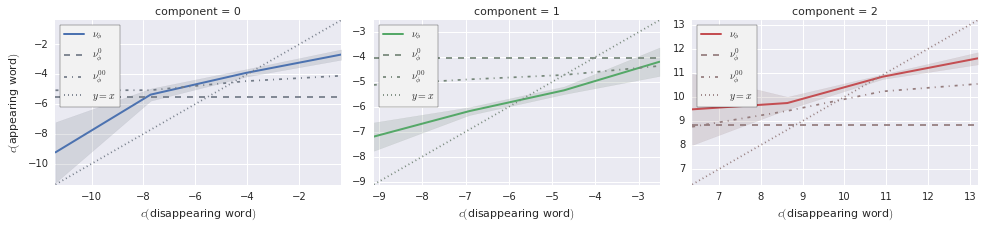

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1462 (cluster-unique) substitutions, but the PCA is in fact computed on 680 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.